In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Any results you write to the current directory are saved as output.

In [2]:
#matplotlib este folosit pentru a realiza grafice
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [3]:
df = pd.read_csv("heart.csv")

In [4]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

pandas_profiling - o librărie ce oferă o analiză automată a setului de date: distributii, tipuri de variabile, valori și o serie intreaga de informatii aditionale.
Pentru a o putea folosi trebuie să ștergem libraria default din colab și să instalăm o versiune specifică. 
După instalare trebuie să facem restart la runtime.

In [0]:
!pip uninstall pandas-profiling

In [0]:
!pip install pandas-profiling==2.7.1

In [5]:
from pandas_profiling import ProfileReport

/home/ioana/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
prof=ProfileReport(df)

In [7]:
#Statisticile pot fi salvate În format html
prof.to_file(output_file='output.html')

In [8]:
prof

In [9]:
#Pentru seturi de date mari este indicat să folosim versiunea minimală a librăriei
prof=ProfileReport(df,minimal=True)

In [10]:
prof.to_file(output_file='output-min.html')

In [11]:
prof

In [12]:
#Selectăm datele de intrare in retea eliminand ultima coloană din csv
X = df.drop("target", axis=1)
#obținem etichetele pentru date salvand ultima coloana
y = df['target']

In [13]:
#folosim o functie din sklearn ce creaza seturi de date pentru antrenare si validare
from sklearn.model_selection import train_test_split

In [14]:
#primim ca output seturile de date corespunzatoare.
#Test size ne spune cat de mare procentual sa avem setul de validare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [15]:
#Verificam distributia etichetelor de 0 si 1.
#Suma etichetelor ne da numarul de intrari cu 1.
#Ideal ar trebui sa avem o distributie echilibrata intre cele 2 valori
sum(y_train), len(y_train)

(127, 242)

In [16]:
sum(y_test), len(y_test)

(38, 61)

In [17]:
#Pentru normalizarea datelor folosim MinMaxScaler din sklearn
from sklearn.preprocessing import MinMaxScaler

In [18]:
X_train

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
286   59    1   3       134   204    0        1      162      0      0.8   
123   54    0   2       108   267    0        0      167      0      0.0   
152   64    1   3       170   227    0        0      155      0      0.6   
132   42    1   1       120   295    0        1      162      0      0.0   
187   54    1   0       124   266    0        0      109      1      2.2   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
289   55    0   0       128   205    0        2      130      1      2.0   
33    54    1   2       125   273    0        0      152      0      0.5   
10    54    1   0       140   239    0        1      160      0      1.2   
201   60    1   0       125   258    0        0      141      1      2.8   
300   68    1   0       144   193    1        1      141      0      3.4   

     slope  ca  thal  
286      2   2     2  
123      2   0     2  
152      1   0     3  
132      2   0     2  
187      1   1     3  
..     ...  ..   ...  
289      1   1     3  
33       0   1     2  
10       2   0     2  
201      1   1     3  
300      1   2     3  

[242 rows x 13 columns]

In [19]:
y_train

286    0
123    1
152    1
132    1
187    0
      ..
289    0
33     1
10     1
201    0
300    0
Name: target, Length: 242, dtype: int64

In [20]:
# Functia va translata fiecare feature in parte in intervalul (-1,1)
# Funcția practic relizează următoarele
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min


sc = MinMaxScaler((-1, 1))

In [21]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
X_test

array([[-0.75      , -1.        , -1.        , -0.16981132, -0.73846154,
        -1.        ,  0.        ,  0.69465649, -1.        , -0.5       ,
         1.        , -1.        ,  0.33333333],
       [ 0.5       , -1.        ,  0.33333333,  0.24528302,  0.62307692,
        -1.        , -1.        ,  0.22137405, -1.        , -0.71428571,
         1.        , -1.        ,  0.33333333],
       [ 0.375     ,  1.        , -0.33333333, -0.50943396,  0.01538462,
        -1.        , -1.        , -0.51145038, -1.        , -0.5       ,
         0.        , -0.5       ,  1.        ],
       [ 0.45833333, -1.        ,  0.33333333, -0.13207547,  0.26153846,
        -1.        ,  0.        , -0.05343511, -1.        , -0.92857143,
         1.        , -1.        ,  1.        ],
       [ 0.70833333,  1.        , -1.        , -0.03773585, -0.80769231,
        -1.        ,  0.        , -0.17557252,  1.        , -0.07142857,
        -1.        , -1.        ,  1.        ],
       [-0.625     ,  1.      

In [23]:
import torch
from torch import nn, optim

In [24]:
X_train.shape

(242, 13)

In [25]:
y_train.shape

(242,)

In [26]:
X_test.shape

(61, 13)

In [27]:
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train.values).long()
y_test = torch.tensor(y_test.values).long()

In [28]:
class HeartDiseaseNN(nn.Module):
    def __init__(self):
        super(HeartDiseaseNN, self).__init__()

        #Sequential oferă o alternativă mai estetică a codului
        #Rețeaua noastră are 2 neuroni pentru output. 
        #Unul va prezice probabilitatea pentru cazul afirmativ al bolii, iar celălalt va prezice probabilitatea cazului negativ al bolii.
        self.sequential= nn.Sequential(
            nn.Linear(13,100),
            nn.ReLU(),
            nn.Linear(100, 60),
            nn.ReLU(),
            nn.Linear(60, 2)
        )


    def forward(self, x):
        return self.sequential(x)

In [29]:
net = HeartDiseaseNN()

In [30]:
optimizer = optim.SGD(net.parameters(), lr=0.01)
# CrossEntropyLoss este folosit adeseori in problemele de clasificare
# Acesta este compus din functia SoftMax și NLLLoss
# Softmax - Mapează elementele din Tensor in intervalul [0,1] și face ca suma lor să fie 1. O functie foarte utilă atunci cand vrem sa calculam probabilitati dintr-un Tensor.
# NLLLoss - negative log likelihood loss, functie folosită adeseori in problemele de clasificare
criterion = nn.CrossEntropyLoss()

In [31]:
#Colectăm loss-urile din antrenare pentru a le plota ulterior
losses = []

In [32]:
# Colectăm accuratetea pentru a o plota ulterior
accuracies=[]

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
# Training loop
def train(epoch):
    # Setează câteva flaguri în rețeaua neurală. Specific activează Dropout-ul și BatchNormalization dacă este cazul.
    # În exemplul nostru are un rol pur demonstrativ, nefiind necesar.
    net.train()

    #Obținem predictii
    outputs = net(X_train)
    # Compute and print loss
    loss = criterion(outputs, y_train)
    
    losses.append(loss.item())
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Train Epoch: {epoch} Loss:{loss.item()}")

In [35]:
# Colectăm loss-ul din validare pentru a o plota ulterior
test_losses=[]

In [36]:
def validation():
    #Pune pe off flagurile setate in model.train()
    #Din nou, în exemplul nostru e pur demonstrativ.
    net.eval()

    test_loss=0
    correct = 0

    with torch.no_grad():

        output=net(X_test)

        test_loss= criterion(output, y_test)
        test_losses.append(test_loss.item())

        #Obținem predictiile pentru fiecare linie din setul de validare.
        #Practic ne returnează rezultatul cu cea mai mare probabilitate pentru fiecare intrare din setul de validare 
        pred = output.data.max(1, keepdim=True)[1]

        #Verificăm câte predicții sunt corecte și le însumăm numărul pentru a afla totalul de predicții corecte
        #correct += pred.eq(y_test.data.view_as(pred)).sum()
        #O altă functie din sklearn ne poate ajuta să abstractizăm operatia de mai sus.

        accuracy = accuracy_score(y_test, pred)
        
        print("============")
        print(f"[Validation set] Average loss: {test_loss}, Accuracy: {100 * accuracy}%")
        print("============")

        accuracies.append(accuracy)


In [37]:
#după fiecare epocă de train() verificăm rezultatele pe setul de validare
for epoch in range(10000):
  train(epoch)
  validation()

Train Epoch: 0 Loss:0.7037495374679565
[Validation set] Average loss: 0.7183977365493774, Accuracy: 37.704918032786885%
Train Epoch: 1 Loss:0.7027630805969238
[Validation set] Average loss: 0.7169925570487976, Accuracy: 37.704918032786885%
Train Epoch: 2 Loss:0.7017967104911804
[Validation set] Average loss: 0.7156087160110474, Accuracy: 37.704918032786885%
Train Epoch: 3 Loss:0.7008485198020935
[Validation set] Average loss: 0.7142523527145386, Accuracy: 37.704918032786885%
Train Epoch: 4 Loss:0.6999154090881348
[Validation set] Average loss: 0.7129160165786743, Accuracy: 37.704918032786885%
Train Epoch: 5 Loss:0.6989946961402893
[Validation set] Average loss: 0.7116038799285889, Accuracy: 37.704918032786885%
Train Epoch: 6 Loss:0.6980928182601929
[Validation set] Average loss: 0.7103120684623718, Accuracy: 37.704918032786885%
Train Epoch: 7 Loss:0.6972075700759888
[Validation set] Average loss: 0.7090429663658142, Accuracy: 37.704918032786885%
Train Epoch: 8 Loss:0.696337878704071
[V

[Validation set] Average loss: 0.6363459825515747, Accuracy: 85.24590163934425%
Train Epoch: 93 Loss:0.6477310061454773
[Validation set] Average loss: 0.635657012462616, Accuracy: 85.24590163934425%
Train Epoch: 94 Loss:0.6472527384757996
[Validation set] Average loss: 0.6349700689315796, Accuracy: 85.24590163934425%
Train Epoch: 95 Loss:0.6467751860618591
[Validation set] Average loss: 0.6342853307723999, Accuracy: 85.24590163934425%
Train Epoch: 96 Loss:0.6462967991828918
[Validation set] Average loss: 0.6336026787757874, Accuracy: 85.24590163934425%
Train Epoch: 97 Loss:0.6458197832107544
[Validation set] Average loss: 0.6329213380813599, Accuracy: 85.24590163934425%
Train Epoch: 98 Loss:0.645343005657196
[Validation set] Average loss: 0.6322386264801025, Accuracy: 85.24590163934425%
Train Epoch: 99 Loss:0.6448655724525452
[Validation set] Average loss: 0.6315557956695557, Accuracy: 85.24590163934425%
Train Epoch: 100 Loss:0.6443875432014465
[Validation set] Average loss: 0.63087254

[Validation set] Average loss: 0.5922787189483643, Accuracy: 85.24590163934425%
Train Epoch: 156 Loss:0.6160780787467957
[Validation set] Average loss: 0.5915507674217224, Accuracy: 85.24590163934425%
Train Epoch: 157 Loss:0.6155398488044739
[Validation set] Average loss: 0.590821385383606, Accuracy: 85.24590163934425%
Train Epoch: 158 Loss:0.615001380443573
[Validation set] Average loss: 0.5900919437408447, Accuracy: 85.24590163934425%
Train Epoch: 159 Loss:0.6144604086875916
[Validation set] Average loss: 0.5893601775169373, Accuracy: 85.24590163934425%
Train Epoch: 160 Loss:0.6139182448387146
[Validation set] Average loss: 0.5886255502700806, Accuracy: 85.24590163934425%
Train Epoch: 161 Loss:0.6133734583854675
[Validation set] Average loss: 0.5878897309303284, Accuracy: 85.24590163934425%
Train Epoch: 162 Loss:0.6128284335136414
[Validation set] Average loss: 0.5871527791023254, Accuracy: 85.24590163934425%
Train Epoch: 163 Loss:0.6122821569442749
[Validation set] Average loss: 0.5

Train Epoch: 222 Loss:0.5782238841056824
[Validation set] Average loss: 0.5405265688896179, Accuracy: 85.24590163934425%
Train Epoch: 223 Loss:0.5776233673095703
[Validation set] Average loss: 0.5397213697433472, Accuracy: 85.24590163934425%
Train Epoch: 224 Loss:0.5770222544670105
[Validation set] Average loss: 0.5389158725738525, Accuracy: 85.24590163934425%
Train Epoch: 225 Loss:0.5764211416244507
[Validation set] Average loss: 0.538109540939331, Accuracy: 85.24590163934425%
Train Epoch: 226 Loss:0.5758190751075745
[Validation set] Average loss: 0.5373023748397827, Accuracy: 85.24590163934425%
Train Epoch: 227 Loss:0.5752164721488953
[Validation set] Average loss: 0.5364931225776672, Accuracy: 85.24590163934425%
Train Epoch: 228 Loss:0.5746137499809265
[Validation set] Average loss: 0.5356823801994324, Accuracy: 85.24590163934425%
Train Epoch: 229 Loss:0.574009895324707
[Validation set] Average loss: 0.5348702073097229, Accuracy: 85.24590163934425%
Train Epoch: 230 Loss:0.5734043717

[Validation set] Average loss: 0.4795927405357361, Accuracy: 83.60655737704919%
Train Epoch: 298 Loss:0.5321075320243835
[Validation set] Average loss: 0.4787942171096802, Accuracy: 83.60655737704919%
Train Epoch: 299 Loss:0.5315098166465759
[Validation set] Average loss: 0.4779976010322571, Accuracy: 83.60655737704919%
Train Epoch: 300 Loss:0.5309132933616638
[Validation set] Average loss: 0.4772023856639862, Accuracy: 83.60655737704919%
Train Epoch: 301 Loss:0.5303171873092651
[Validation set] Average loss: 0.47640857100486755, Accuracy: 83.60655737704919%
Train Epoch: 302 Loss:0.5297223329544067
[Validation set] Average loss: 0.4756150543689728, Accuracy: 83.60655737704919%
Train Epoch: 303 Loss:0.5291280746459961
[Validation set] Average loss: 0.4748222529888153, Accuracy: 83.60655737704919%
Train Epoch: 304 Loss:0.5285347700119019
[Validation set] Average loss: 0.47403115034103394, Accuracy: 83.60655737704919%
Train Epoch: 305 Loss:0.5279417634010315
[Validation set] Average loss:

[Validation set] Average loss: 0.42807304859161377, Accuracy: 86.88524590163934%
Train Epoch: 367 Loss:0.49334368109703064
[Validation set] Average loss: 0.4273885488510132, Accuracy: 86.88524590163934%
Train Epoch: 368 Loss:0.4928274154663086
[Validation set] Average loss: 0.42670708894729614, Accuracy: 86.88524590163934%
Train Epoch: 369 Loss:0.492313027381897
[Validation set] Average loss: 0.42602840065956116, Accuracy: 86.88524590163934%
Train Epoch: 370 Loss:0.49180033802986145
[Validation set] Average loss: 0.4253520369529724, Accuracy: 86.88524590163934%
Train Epoch: 371 Loss:0.491288423538208
[Validation set] Average loss: 0.42467764019966125, Accuracy: 86.88524590163934%
Train Epoch: 372 Loss:0.4907783567905426
[Validation set] Average loss: 0.42400529980659485, Accuracy: 86.88524590163934%
Train Epoch: 373 Loss:0.4902696907520294
[Validation set] Average loss: 0.42333555221557617, Accuracy: 86.88524590163934%
Train Epoch: 374 Loss:0.4897622764110565
[Validation set] Average l

Train Epoch: 428 Loss:0.46470192074775696
[Validation set] Average loss: 0.3899720013141632, Accuracy: 88.52459016393442%
Train Epoch: 429 Loss:0.46427929401397705
[Validation set] Average loss: 0.38942885398864746, Accuracy: 88.52459016393442%
Train Epoch: 430 Loss:0.4638584852218628
[Validation set] Average loss: 0.3888893723487854, Accuracy: 88.52459016393442%
Train Epoch: 431 Loss:0.46343931555747986
[Validation set] Average loss: 0.38835346698760986, Accuracy: 88.52459016393442%
Train Epoch: 432 Loss:0.463021844625473
[Validation set] Average loss: 0.38781988620758057, Accuracy: 88.52459016393442%
Train Epoch: 433 Loss:0.46260616183280945
[Validation set] Average loss: 0.3872889280319214, Accuracy: 88.52459016393442%
Train Epoch: 434 Loss:0.46219170093536377
[Validation set] Average loss: 0.3867602050304413, Accuracy: 88.52459016393442%
Train Epoch: 435 Loss:0.4617786109447479
[Validation set] Average loss: 0.38623422384262085, Accuracy: 88.52459016393442%
Train Epoch: 436 Loss:0.

[Validation set] Average loss: 0.3616655468940735, Accuracy: 88.52459016393442%
Train Epoch: 489 Loss:0.4413321912288666
[Validation set] Average loss: 0.3612622022628784, Accuracy: 88.52459016393442%
Train Epoch: 490 Loss:0.440988153219223
[Validation set] Average loss: 0.36086058616638184, Accuracy: 88.52459016393442%
Train Epoch: 491 Loss:0.4406449794769287
[Validation set] Average loss: 0.36046192049980164, Accuracy: 88.52459016393442%
Train Epoch: 492 Loss:0.4403032064437866
[Validation set] Average loss: 0.3600645661354065, Accuracy: 88.52459016393442%
Train Epoch: 493 Loss:0.43996286392211914
[Validation set] Average loss: 0.35966938734054565, Accuracy: 88.52459016393442%
Train Epoch: 494 Loss:0.4396233856678009
[Validation set] Average loss: 0.3592762053012848, Accuracy: 88.52459016393442%
Train Epoch: 495 Loss:0.43928518891334534
[Validation set] Average loss: 0.3588852882385254, Accuracy: 88.52459016393442%
Train Epoch: 496 Loss:0.4389479458332062
[Validation set] Average los

[Validation set] Average loss: 0.3293493986129761, Accuracy: 90.1639344262295%
Train Epoch: 596 Loss:0.4104236960411072
[Validation set] Average loss: 0.3291366994380951, Accuracy: 90.1639344262295%
Train Epoch: 597 Loss:0.4101814031600952
[Validation set] Average loss: 0.32892537117004395, Accuracy: 90.1639344262295%
Train Epoch: 598 Loss:0.40994009375572205
[Validation set] Average loss: 0.3287155330181122, Accuracy: 90.1639344262295%
Train Epoch: 599 Loss:0.40969955921173096
[Validation set] Average loss: 0.3285070061683655, Accuracy: 90.1639344262295%
Train Epoch: 600 Loss:0.4094597399234772
[Validation set] Average loss: 0.32829996943473816, Accuracy: 90.1639344262295%
Train Epoch: 601 Loss:0.4092206656932831
[Validation set] Average loss: 0.3280944228172302, Accuracy: 90.1639344262295%
Train Epoch: 602 Loss:0.40898236632347107
[Validation set] Average loss: 0.32789093255996704, Accuracy: 90.1639344262295%
Train Epoch: 603 Loss:0.408744752407074
[Validation set] Average loss: 0.32

Train Epoch: 694 Loss:0.38971805572509766
[Validation set] Average loss: 0.31445130705833435, Accuracy: 91.80327868852459%
Train Epoch: 695 Loss:0.38953322172164917
[Validation set] Average loss: 0.3143566846847534, Accuracy: 91.80327868852459%
Train Epoch: 696 Loss:0.3893486559391022
[Validation set] Average loss: 0.3142630457878113, Accuracy: 91.80327868852459%
Train Epoch: 697 Loss:0.38916462659835815
[Validation set] Average loss: 0.3141699731349945, Accuracy: 91.80327868852459%
Train Epoch: 698 Loss:0.3889809250831604
[Validation set] Average loss: 0.31407812237739563, Accuracy: 91.80327868852459%
Train Epoch: 699 Loss:0.38879841566085815
[Validation set] Average loss: 0.3139873445034027, Accuracy: 91.80327868852459%
Train Epoch: 700 Loss:0.38861608505249023
[Validation set] Average loss: 0.3138974606990814, Accuracy: 91.80327868852459%
Train Epoch: 701 Loss:0.38843420147895813
[Validation set] Average loss: 0.3138079345226288, Accuracy: 91.80327868852459%
Train Epoch: 702 Loss:0.

Train Epoch: 814 Loss:0.3704681694507599
[Validation set] Average loss: 0.3088225722312927, Accuracy: 91.80327868852459%
Train Epoch: 815 Loss:0.37033146619796753
[Validation set] Average loss: 0.30881452560424805, Accuracy: 91.80327868852459%
Train Epoch: 816 Loss:0.37019553780555725
[Validation set] Average loss: 0.30880630016326904, Accuracy: 91.80327868852459%
Train Epoch: 817 Loss:0.37005946040153503
[Validation set] Average loss: 0.3088003098964691, Accuracy: 91.80327868852459%
Train Epoch: 818 Loss:0.3699241280555725
[Validation set] Average loss: 0.3087945282459259, Accuracy: 91.80327868852459%
Train Epoch: 819 Loss:0.3697890341281891
[Validation set] Average loss: 0.30878883600234985, Accuracy: 91.80327868852459%
Train Epoch: 820 Loss:0.36965417861938477
[Validation set] Average loss: 0.30878403782844543, Accuracy: 91.80327868852459%
Train Epoch: 821 Loss:0.3695198893547058
[Validation set] Average loss: 0.30877959728240967, Accuracy: 91.80327868852459%
Train Epoch: 822 Loss:0

Train Epoch: 883 Loss:0.3617894649505615
[Validation set] Average loss: 0.30955958366394043, Accuracy: 91.80327868852459%
Train Epoch: 884 Loss:0.36167415976524353
[Validation set] Average loss: 0.30958548188209534, Accuracy: 91.80327868852459%
Train Epoch: 885 Loss:0.3615584671497345
[Validation set] Average loss: 0.3096108138561249, Accuracy: 91.80327868852459%
Train Epoch: 886 Loss:0.36144348978996277
[Validation set] Average loss: 0.3096383810043335, Accuracy: 91.80327868852459%
Train Epoch: 887 Loss:0.36132848262786865
[Validation set] Average loss: 0.3096645772457123, Accuracy: 91.80327868852459%
Train Epoch: 888 Loss:0.3612135946750641
[Validation set] Average loss: 0.30969056487083435, Accuracy: 91.80327868852459%
Train Epoch: 889 Loss:0.3610995411872864
[Validation set] Average loss: 0.30971759557724, Accuracy: 91.80327868852459%
Train Epoch: 890 Loss:0.36098554730415344
[Validation set] Average loss: 0.30974406003952026, Accuracy: 91.80327868852459%
Train Epoch: 891 Loss:0.36

Train Epoch: 954 Loss:0.3541736900806427
[Validation set] Average loss: 0.3122894763946533, Accuracy: 91.80327868852459%
Train Epoch: 955 Loss:0.35407423973083496
[Validation set] Average loss: 0.3123401999473572, Accuracy: 91.80327868852459%
Train Epoch: 956 Loss:0.3539753556251526
[Validation set] Average loss: 0.31239229440689087, Accuracy: 91.80327868852459%
Train Epoch: 957 Loss:0.3538764715194702
[Validation set] Average loss: 0.3124435544013977, Accuracy: 91.80327868852459%
Train Epoch: 958 Loss:0.353777676820755
[Validation set] Average loss: 0.31249380111694336, Accuracy: 91.80327868852459%
Train Epoch: 959 Loss:0.3536792993545532
[Validation set] Average loss: 0.31254565715789795, Accuracy: 91.80327868852459%
Train Epoch: 960 Loss:0.35358089208602905
[Validation set] Average loss: 0.3125978708267212, Accuracy: 91.80327868852459%
Train Epoch: 961 Loss:0.35348275303840637
[Validation set] Average loss: 0.31264883279800415, Accuracy: 91.80327868852459%
Train Epoch: 962 Loss:0.35

Train Epoch: 1018 Loss:0.3481256067752838
[Validation set] Average loss: 0.3160965144634247, Accuracy: 91.80327868852459%
Train Epoch: 1019 Loss:0.34803661704063416
[Validation set] Average loss: 0.3161609470844269, Accuracy: 91.80327868852459%
Train Epoch: 1020 Loss:0.3479481041431427
[Validation set] Average loss: 0.31622323393821716, Accuracy: 91.80327868852459%
Train Epoch: 1021 Loss:0.3478597402572632
[Validation set] Average loss: 0.316287100315094, Accuracy: 91.80327868852459%
Train Epoch: 1022 Loss:0.34777161478996277
[Validation set] Average loss: 0.3163517117500305, Accuracy: 91.80327868852459%
Train Epoch: 1023 Loss:0.3476839065551758
[Validation set] Average loss: 0.3164162039756775, Accuracy: 91.80327868852459%
Train Epoch: 1024 Loss:0.3475959599018097
[Validation set] Average loss: 0.31648164987564087, Accuracy: 91.80327868852459%
Train Epoch: 1025 Loss:0.34750837087631226
[Validation set] Average loss: 0.3165459632873535, Accuracy: 91.80327868852459%
Train Epoch: 1026 Lo

[Validation set] Average loss: 0.3212053179740906, Accuracy: 90.1639344262295%
Train Epoch: 1091 Loss:0.34205639362335205
[Validation set] Average loss: 0.32127997279167175, Accuracy: 90.1639344262295%
Train Epoch: 1092 Loss:0.3419784903526306
[Validation set] Average loss: 0.32135534286499023, Accuracy: 90.1639344262295%
Train Epoch: 1093 Loss:0.34190070629119873
[Validation set] Average loss: 0.32143107056617737, Accuracy: 90.1639344262295%
Train Epoch: 1094 Loss:0.341823011636734
[Validation set] Average loss: 0.3215048313140869, Accuracy: 90.1639344262295%
Train Epoch: 1095 Loss:0.3417454957962036
[Validation set] Average loss: 0.3215792775154114, Accuracy: 90.1639344262295%
Train Epoch: 1096 Loss:0.3416682481765747
[Validation set] Average loss: 0.321654349565506, Accuracy: 90.1639344262295%
Train Epoch: 1097 Loss:0.34159088134765625
[Validation set] Average loss: 0.3217296898365021, Accuracy: 90.1639344262295%
Train Epoch: 1098 Loss:0.34151384234428406
[Validation set] Average lo

Train Epoch: 1166 Loss:0.3365629017353058
[Validation set] Average loss: 0.32707467675209045, Accuracy: 90.1639344262295%
Train Epoch: 1167 Loss:0.3364943265914917
[Validation set] Average loss: 0.3271549344062805, Accuracy: 90.1639344262295%
Train Epoch: 1168 Loss:0.33642590045928955
[Validation set] Average loss: 0.32723838090896606, Accuracy: 90.1639344262295%
Train Epoch: 1169 Loss:0.3363577127456665
[Validation set] Average loss: 0.32732027769088745, Accuracy: 90.1639344262295%
Train Epoch: 1170 Loss:0.3362894654273987
[Validation set] Average loss: 0.32740214467048645, Accuracy: 90.1639344262295%
Train Epoch: 1171 Loss:0.3362213373184204
[Validation set] Average loss: 0.32748547196388245, Accuracy: 90.1639344262295%
Train Epoch: 1172 Loss:0.33615347743034363
[Validation set] Average loss: 0.32756781578063965, Accuracy: 90.1639344262295%
Train Epoch: 1173 Loss:0.3360859751701355
[Validation set] Average loss: 0.3276490271091461, Accuracy: 90.1639344262295%
Train Epoch: 1174 Loss:0

Train Epoch: 1253 Loss:0.33087581396102905
[Validation set] Average loss: 0.33420872688293457, Accuracy: 88.52459016393442%
Train Epoch: 1254 Loss:0.33081257343292236
[Validation set] Average loss: 0.3342897891998291, Accuracy: 88.52459016393442%
Train Epoch: 1255 Loss:0.33074939250946045
[Validation set] Average loss: 0.3343700170516968, Accuracy: 88.52459016393442%
Train Epoch: 1256 Loss:0.33068645000457764
[Validation set] Average loss: 0.334454208612442, Accuracy: 88.52459016393442%
Train Epoch: 1257 Loss:0.330623596906662
[Validation set] Average loss: 0.33453357219696045, Accuracy: 88.52459016393442%
Train Epoch: 1258 Loss:0.3305608630180359
[Validation set] Average loss: 0.33461710810661316, Accuracy: 88.52459016393442%
Train Epoch: 1259 Loss:0.3304980993270874
[Validation set] Average loss: 0.3347007930278778, Accuracy: 88.52459016393442%
Train Epoch: 1260 Loss:0.33043500781059265
[Validation set] Average loss: 0.33478447794914246, Accuracy: 88.52459016393442%
Train Epoch: 1261

[Validation set] Average loss: 0.34366318583488464, Accuracy: 88.52459016393442%
Train Epoch: 1368 Loss:0.3240651786327362
[Validation set] Average loss: 0.3437502086162567, Accuracy: 88.52459016393442%
Train Epoch: 1369 Loss:0.3240104019641876
[Validation set] Average loss: 0.34383177757263184, Accuracy: 88.52459016393442%
Train Epoch: 1370 Loss:0.3239554464817047
[Validation set] Average loss: 0.343913733959198, Accuracy: 88.52459016393442%
Train Epoch: 1371 Loss:0.32390084862709045
[Validation set] Average loss: 0.34400177001953125, Accuracy: 88.52459016393442%
Train Epoch: 1372 Loss:0.32384639978408813
[Validation set] Average loss: 0.34408557415008545, Accuracy: 88.52459016393442%
Train Epoch: 1373 Loss:0.32379186153411865
[Validation set] Average loss: 0.34416863322257996, Accuracy: 88.52459016393442%
Train Epoch: 1374 Loss:0.3237370252609253
[Validation set] Average loss: 0.344252347946167, Accuracy: 88.52459016393442%
Train Epoch: 1375 Loss:0.32368263602256775
[Validation set] 

[Validation set] Average loss: 0.3494148850440979, Accuracy: 86.88524590163934%
Train Epoch: 1437 Loss:0.3203466534614563
[Validation set] Average loss: 0.3494917154312134, Accuracy: 86.88524590163934%
Train Epoch: 1438 Loss:0.3202939033508301
[Validation set] Average loss: 0.3495720326900482, Accuracy: 86.88524590163934%
Train Epoch: 1439 Loss:0.3202415108680725
[Validation set] Average loss: 0.3496510684490204, Accuracy: 86.88524590163934%
Train Epoch: 1440 Loss:0.3201889395713806
[Validation set] Average loss: 0.3497317135334015, Accuracy: 86.88524590163934%
Train Epoch: 1441 Loss:0.3201367259025574
[Validation set] Average loss: 0.34980860352516174, Accuracy: 86.88524590163934%
Train Epoch: 1442 Loss:0.32008445262908936
[Validation set] Average loss: 0.3498905301094055, Accuracy: 86.88524590163934%
Train Epoch: 1443 Loss:0.32003283500671387
[Validation set] Average loss: 0.3499748408794403, Accuracy: 86.88524590163934%
Train Epoch: 1444 Loss:0.31998103857040405
[Validation set] Ave

[Validation set] Average loss: 0.35401684045791626, Accuracy: 86.88524590163934%
Train Epoch: 1494 Loss:0.3173801600933075
[Validation set] Average loss: 0.35410037636756897, Accuracy: 86.88524590163934%
Train Epoch: 1495 Loss:0.3173285126686096
[Validation set] Average loss: 0.3541783392429352, Accuracy: 86.88524590163934%
Train Epoch: 1496 Loss:0.3172775208950043
[Validation set] Average loss: 0.35426560044288635, Accuracy: 86.88524590163934%
Train Epoch: 1497 Loss:0.31722691655158997
[Validation set] Average loss: 0.35434815287590027, Accuracy: 86.88524590163934%
Train Epoch: 1498 Loss:0.3171762228012085
[Validation set] Average loss: 0.354427307844162, Accuracy: 86.88524590163934%
Train Epoch: 1499 Loss:0.31712576746940613
[Validation set] Average loss: 0.35451000928878784, Accuracy: 86.88524590163934%
Train Epoch: 1500 Loss:0.3170751631259918
[Validation set] Average loss: 0.3545931577682495, Accuracy: 86.88524590163934%
Train Epoch: 1501 Loss:0.3170246183872223
[Validation set] A

Train Epoch: 1569 Loss:0.31368377804756165
[Validation set] Average loss: 0.3599509596824646, Accuracy: 86.88524590163934%
Train Epoch: 1570 Loss:0.31363552808761597
[Validation set] Average loss: 0.36003273725509644, Accuracy: 86.88524590163934%
Train Epoch: 1571 Loss:0.313587486743927
[Validation set] Average loss: 0.36010652780532837, Accuracy: 86.88524590163934%
Train Epoch: 1572 Loss:0.31353941559791565
[Validation set] Average loss: 0.3601785898208618, Accuracy: 86.88524590163934%
Train Epoch: 1573 Loss:0.3134913444519043
[Validation set] Average loss: 0.3602536916732788, Accuracy: 86.88524590163934%
Train Epoch: 1574 Loss:0.313443124294281
[Validation set] Average loss: 0.36033353209495544, Accuracy: 86.88524590163934%
Train Epoch: 1575 Loss:0.3133951425552368
[Validation set] Average loss: 0.3604139983654022, Accuracy: 86.88524590163934%
Train Epoch: 1576 Loss:0.3133471608161926
[Validation set] Average loss: 0.36048465967178345, Accuracy: 86.88524590163934%
Train Epoch: 1577 L

[Validation set] Average loss: 0.3647019863128662, Accuracy: 86.88524590163934%
Train Epoch: 1634 Loss:0.31058406829833984
[Validation set] Average loss: 0.36476850509643555, Accuracy: 86.88524590163934%
Train Epoch: 1635 Loss:0.3105355501174927
[Validation set] Average loss: 0.3648429214954376, Accuracy: 86.88524590163934%
Train Epoch: 1636 Loss:0.31048697233200073
[Validation set] Average loss: 0.3649135231971741, Accuracy: 86.88524590163934%
Train Epoch: 1637 Loss:0.3104383647441864
[Validation set] Average loss: 0.3649905323982239, Accuracy: 86.88524590163934%
Train Epoch: 1638 Loss:0.31038981676101685
[Validation set] Average loss: 0.3650606870651245, Accuracy: 86.88524590163934%
Train Epoch: 1639 Loss:0.31034111976623535
[Validation set] Average loss: 0.36513054370880127, Accuracy: 86.88524590163934%
Train Epoch: 1640 Loss:0.3102928102016449
[Validation set] Average loss: 0.3652021586894989, Accuracy: 86.88524590163934%
Train Epoch: 1641 Loss:0.3102443516254425
[Validation set] A

[Validation set] Average loss: 0.3714796006679535, Accuracy: 86.88524590163934%
Train Epoch: 1732 Loss:0.3058796226978302
[Validation set] Average loss: 0.3715488314628601, Accuracy: 86.88524590163934%
Train Epoch: 1733 Loss:0.3058311939239502
[Validation set] Average loss: 0.37162283062934875, Accuracy: 86.88524590163934%
Train Epoch: 1734 Loss:0.30578309297561646
[Validation set] Average loss: 0.3716869354248047, Accuracy: 86.88524590163934%
Train Epoch: 1735 Loss:0.3057345747947693
[Validation set] Average loss: 0.37176644802093506, Accuracy: 86.88524590163934%
Train Epoch: 1736 Loss:0.30568623542785645
[Validation set] Average loss: 0.37183257937431335, Accuracy: 86.88524590163934%
Train Epoch: 1737 Loss:0.30563750863075256
[Validation set] Average loss: 0.37190020084381104, Accuracy: 86.88524590163934%
Train Epoch: 1738 Loss:0.30558955669403076
[Validation set] Average loss: 0.37197962403297424, Accuracy: 86.88524590163934%
Train Epoch: 1739 Loss:0.305541455745697
[Validation set]

[Validation set] Average loss: 0.37733036279678345, Accuracy: 86.88524590163934%
Train Epoch: 1817 Loss:0.30177041888237
[Validation set] Average loss: 0.37740710377693176, Accuracy: 86.88524590163934%
Train Epoch: 1818 Loss:0.3017238974571228
[Validation set] Average loss: 0.37746673822402954, Accuracy: 86.88524590163934%
Train Epoch: 1819 Loss:0.3016771078109741
[Validation set] Average loss: 0.37754130363464355, Accuracy: 86.88524590163934%
Train Epoch: 1820 Loss:0.3016304671764374
[Validation set] Average loss: 0.37760215997695923, Accuracy: 86.88524590163934%
Train Epoch: 1821 Loss:0.3015838861465454
[Validation set] Average loss: 0.3776717185974121, Accuracy: 86.88524590163934%
Train Epoch: 1822 Loss:0.30153727531433105
[Validation set] Average loss: 0.37773528695106506, Accuracy: 86.88524590163934%
Train Epoch: 1823 Loss:0.3014911711215973
[Validation set] Average loss: 0.3778098225593567, Accuracy: 86.88524590163934%
Train Epoch: 1824 Loss:0.3014448583126068
[Validation set] Av

[Validation set] Average loss: 0.38131269812583923, Accuracy: 86.88524590163934%
Train Epoch: 1881 Loss:0.2987617552280426
[Validation set] Average loss: 0.38136452436447144, Accuracy: 86.88524590163934%
Train Epoch: 1882 Loss:0.29871493577957153
[Validation set] Average loss: 0.3814317286014557, Accuracy: 86.88524590163934%
Train Epoch: 1883 Loss:0.2986685335636139
[Validation set] Average loss: 0.3814964294433594, Accuracy: 86.88524590163934%
Train Epoch: 1884 Loss:0.2986222803592682
[Validation set] Average loss: 0.3815452754497528, Accuracy: 86.88524590163934%
Train Epoch: 1885 Loss:0.2985754609107971
[Validation set] Average loss: 0.3816063702106476, Accuracy: 86.88524590163934%
Train Epoch: 1886 Loss:0.2985290586948395
[Validation set] Average loss: 0.38166847825050354, Accuracy: 86.88524590163934%
Train Epoch: 1887 Loss:0.29848262667655945
[Validation set] Average loss: 0.381723552942276, Accuracy: 86.88524590163934%
Train Epoch: 1888 Loss:0.2984362244606018
[Validation set] Ave

Train Epoch: 1950 Loss:0.29541462659835815
[Validation set] Average loss: 0.38551920652389526, Accuracy: 85.24590163934425%
Train Epoch: 1951 Loss:0.2953662574291229
[Validation set] Average loss: 0.3855677843093872, Accuracy: 85.24590163934425%
Train Epoch: 1952 Loss:0.29531773924827576
[Validation set] Average loss: 0.38563165068626404, Accuracy: 85.24590163934425%
Train Epoch: 1953 Loss:0.2952696681022644
[Validation set] Average loss: 0.38569802045822144, Accuracy: 85.24590163934425%
Train Epoch: 1954 Loss:0.2952211797237396
[Validation set] Average loss: 0.3857569396495819, Accuracy: 85.24590163934425%
Train Epoch: 1955 Loss:0.2951725423336029
[Validation set] Average loss: 0.3858085572719574, Accuracy: 85.24590163934425%
Train Epoch: 1956 Loss:0.2951238453388214
[Validation set] Average loss: 0.38587045669555664, Accuracy: 85.24590163934425%
Train Epoch: 1957 Loss:0.2950749397277832
[Validation set] Average loss: 0.3859299123287201, Accuracy: 85.24590163934425%
Train Epoch: 1958 

[Validation set] Average loss: 0.3897295594215393, Accuracy: 85.24590163934425%
Train Epoch: 2030 Loss:0.2916705906391144
[Validation set] Average loss: 0.38978415727615356, Accuracy: 85.24590163934425%
Train Epoch: 2031 Loss:0.29162511229515076
[Validation set] Average loss: 0.3898371756076813, Accuracy: 85.24590163934425%
Train Epoch: 2032 Loss:0.29157954454421997
[Validation set] Average loss: 0.3898806571960449, Accuracy: 85.24590163934425%
Train Epoch: 2033 Loss:0.29153406620025635
[Validation set] Average loss: 0.3899379074573517, Accuracy: 85.24590163934425%
Train Epoch: 2034 Loss:0.2914886176586151
[Validation set] Average loss: 0.3899933993816376, Accuracy: 85.24590163934425%
Train Epoch: 2035 Loss:0.2914433777332306
[Validation set] Average loss: 0.39005526900291443, Accuracy: 85.24590163934425%
Train Epoch: 2036 Loss:0.2913980185985565
[Validation set] Average loss: 0.3901020884513855, Accuracy: 85.24590163934425%
Train Epoch: 2037 Loss:0.29135259985923767
[Validation set] A

[Validation set] Average loss: 0.3947158455848694, Accuracy: 85.24590163934425%
Train Epoch: 2131 Loss:0.28714752197265625
[Validation set] Average loss: 0.39476221799850464, Accuracy: 85.24590163934425%
Train Epoch: 2132 Loss:0.28710657358169556
[Validation set] Average loss: 0.39480844140052795, Accuracy: 85.24590163934425%
Train Epoch: 2133 Loss:0.2870654761791229
[Validation set] Average loss: 0.39486604928970337, Accuracy: 85.24590163934425%
Train Epoch: 2134 Loss:0.2870243787765503
[Validation set] Average loss: 0.3949173092842102, Accuracy: 85.24590163934425%
Train Epoch: 2135 Loss:0.28698334097862244
[Validation set] Average loss: 0.3949737250804901, Accuracy: 85.24590163934425%
Train Epoch: 2136 Loss:0.2869425415992737
[Validation set] Average loss: 0.39502206444740295, Accuracy: 85.24590163934425%
Train Epoch: 2137 Loss:0.2869013547897339
[Validation set] Average loss: 0.3950732946395874, Accuracy: 85.24590163934425%
Train Epoch: 2138 Loss:0.28686025738716125
[Validation set]

[Validation set] Average loss: 0.40148305892944336, Accuracy: 85.24590163934425%
Train Epoch: 2242 Loss:0.2826625406742096
[Validation set] Average loss: 0.4015379846096039, Accuracy: 85.24590163934425%
Train Epoch: 2243 Loss:0.2826223075389862
[Validation set] Average loss: 0.40159833431243896, Accuracy: 85.24590163934425%
Train Epoch: 2244 Loss:0.28258252143859863
[Validation set] Average loss: 0.4016541540622711, Accuracy: 85.24590163934425%
Train Epoch: 2245 Loss:0.28254270553588867
[Validation set] Average loss: 0.40172359347343445, Accuracy: 85.24590163934425%
Train Epoch: 2246 Loss:0.28250256180763245
[Validation set] Average loss: 0.4017859399318695, Accuracy: 85.24590163934425%
Train Epoch: 2247 Loss:0.2824627161026001
[Validation set] Average loss: 0.4018285870552063, Accuracy: 85.24590163934425%
Train Epoch: 2248 Loss:0.2824227809906006
[Validation set] Average loss: 0.40189722180366516, Accuracy: 85.24590163934425%
Train Epoch: 2249 Loss:0.28238290548324585
[Validation set]

[Validation set] Average loss: 0.40795689821243286, Accuracy: 85.24590163934425%
Train Epoch: 2351 Loss:0.27839016914367676
[Validation set] Average loss: 0.40801337361335754, Accuracy: 85.24590163934425%
Train Epoch: 2352 Loss:0.27835074067115784
[Validation set] Average loss: 0.40806958079338074, Accuracy: 85.24590163934425%
Train Epoch: 2353 Loss:0.2783110439777374
[Validation set] Average loss: 0.4081401824951172, Accuracy: 85.24590163934425%
Train Epoch: 2354 Loss:0.2782711982727051
[Validation set] Average loss: 0.40819981694221497, Accuracy: 85.24590163934425%
Train Epoch: 2355 Loss:0.27823108434677124
[Validation set] Average loss: 0.40825608372688293, Accuracy: 85.24590163934425%
Train Epoch: 2356 Loss:0.2781909704208374
[Validation set] Average loss: 0.40831029415130615, Accuracy: 85.24590163934425%
Train Epoch: 2357 Loss:0.27815136313438416
[Validation set] Average loss: 0.4083850085735321, Accuracy: 85.24590163934425%
Train Epoch: 2358 Loss:0.27811112999916077
[Validation s

[Validation set] Average loss: 0.41202789545059204, Accuracy: 85.24590163934425%
Train Epoch: 2419 Loss:0.275672048330307
[Validation set] Average loss: 0.41209840774536133, Accuracy: 85.24590163934425%
Train Epoch: 2420 Loss:0.27563220262527466
[Validation set] Average loss: 0.41214704513549805, Accuracy: 85.24590163934425%
Train Epoch: 2421 Loss:0.27559223771095276
[Validation set] Average loss: 0.41221997141838074, Accuracy: 85.24590163934425%
Train Epoch: 2422 Loss:0.2755524516105652
[Validation set] Average loss: 0.41228049993515015, Accuracy: 85.24590163934425%
Train Epoch: 2423 Loss:0.2755126357078552
[Validation set] Average loss: 0.4123397469520569, Accuracy: 85.24590163934425%
Train Epoch: 2424 Loss:0.2754727602005005
[Validation set] Average loss: 0.4123963713645935, Accuracy: 85.24590163934425%
Train Epoch: 2425 Loss:0.27543264627456665
[Validation set] Average loss: 0.41246768832206726, Accuracy: 85.24590163934425%
Train Epoch: 2426 Loss:0.27539265155792236
[Validation set

[Validation set] Average loss: 0.4163126051425934, Accuracy: 85.24590163934425%
Train Epoch: 2491 Loss:0.27284929156303406
[Validation set] Average loss: 0.4163782596588135, Accuracy: 85.24590163934425%
Train Epoch: 2492 Loss:0.272810161113739
[Validation set] Average loss: 0.41643890738487244, Accuracy: 85.24590163934425%
Train Epoch: 2493 Loss:0.2727710008621216
[Validation set] Average loss: 0.41649359464645386, Accuracy: 85.24590163934425%
Train Epoch: 2494 Loss:0.27273184061050415
[Validation set] Average loss: 0.41655251383781433, Accuracy: 85.24590163934425%
Train Epoch: 2495 Loss:0.27269247174263
[Validation set] Average loss: 0.4166070520877838, Accuracy: 85.24590163934425%
Train Epoch: 2496 Loss:0.27265334129333496
[Validation set] Average loss: 0.4166632294654846, Accuracy: 85.24590163934425%
Train Epoch: 2497 Loss:0.27261415123939514
[Validation set] Average loss: 0.4167262613773346, Accuracy: 85.24590163934425%
Train Epoch: 2498 Loss:0.2725747227668762
[Validation set] Ave

Train Epoch: 2558 Loss:0.2702062726020813
[Validation set] Average loss: 0.420188307762146, Accuracy: 85.24590163934425%
Train Epoch: 2559 Loss:0.27016621828079224
[Validation set] Average loss: 0.420251727104187, Accuracy: 85.24590163934425%
Train Epoch: 2560 Loss:0.2701268494129181
[Validation set] Average loss: 0.4203057885169983, Accuracy: 85.24590163934425%
Train Epoch: 2561 Loss:0.2700871527194977
[Validation set] Average loss: 0.420363187789917, Accuracy: 85.24590163934425%
Train Epoch: 2562 Loss:0.2700473666191101
[Validation set] Average loss: 0.42041805386543274, Accuracy: 85.24590163934425%
Train Epoch: 2563 Loss:0.2700076997280121
[Validation set] Average loss: 0.42047199606895447, Accuracy: 85.24590163934425%
Train Epoch: 2564 Loss:0.2699679136276245
[Validation set] Average loss: 0.42052918672561646, Accuracy: 85.24590163934425%
Train Epoch: 2565 Loss:0.26992830634117126
[Validation set] Average loss: 0.42059019207954407, Accuracy: 85.24590163934425%
Train Epoch: 2566 Los

Train Epoch: 2629 Loss:0.26737353205680847
[Validation set] Average loss: 0.4240564703941345, Accuracy: 85.24590163934425%
Train Epoch: 2630 Loss:0.26733332872390747
[Validation set] Average loss: 0.42411309480667114, Accuracy: 85.24590163934425%
Train Epoch: 2631 Loss:0.26729318499565125
[Validation set] Average loss: 0.42416948080062866, Accuracy: 85.24590163934425%
Train Epoch: 2632 Loss:0.26725295186042786
[Validation set] Average loss: 0.4242188334465027, Accuracy: 85.24590163934425%
Train Epoch: 2633 Loss:0.2672126293182373
[Validation set] Average loss: 0.42427390813827515, Accuracy: 85.24590163934425%
Train Epoch: 2634 Loss:0.26717251539230347
[Validation set] Average loss: 0.4243256449699402, Accuracy: 85.24590163934425%
Train Epoch: 2635 Loss:0.26713231205940247
[Validation set] Average loss: 0.42438337206840515, Accuracy: 85.24590163934425%
Train Epoch: 2636 Loss:0.26709216833114624
[Validation set] Average loss: 0.4244261384010315, Accuracy: 85.24590163934425%
Train Epoch: 

[Validation set] Average loss: 0.42742109298706055, Accuracy: 85.24590163934425%
Train Epoch: 2694 Loss:0.2647387981414795
[Validation set] Average loss: 0.42747485637664795, Accuracy: 85.24590163934425%
Train Epoch: 2695 Loss:0.2646976113319397
[Validation set] Average loss: 0.42752352356910706, Accuracy: 85.24590163934425%
Train Epoch: 2696 Loss:0.2646562159061432
[Validation set] Average loss: 0.42756250500679016, Accuracy: 85.24590163934425%
Train Epoch: 2697 Loss:0.264614999294281
[Validation set] Average loss: 0.42760658264160156, Accuracy: 85.24590163934425%
Train Epoch: 2698 Loss:0.2645737826824188
[Validation set] Average loss: 0.42765697836875916, Accuracy: 85.24590163934425%
Train Epoch: 2699 Loss:0.2645323872566223
[Validation set] Average loss: 0.4277042746543884, Accuracy: 85.24590163934425%
Train Epoch: 2700 Loss:0.26449155807495117
[Validation set] Average loss: 0.4277600646018982, Accuracy: 85.24590163934425%
Train Epoch: 2701 Loss:0.2644506096839905
[Validation set] A

Train Epoch: 2771 Loss:0.2615829110145569
[Validation set] Average loss: 0.4313373863697052, Accuracy: 85.24590163934425%
Train Epoch: 2772 Loss:0.26154178380966187
[Validation set] Average loss: 0.43138882517814636, Accuracy: 85.24590163934425%
Train Epoch: 2773 Loss:0.2615009546279907
[Validation set] Average loss: 0.43144047260284424, Accuracy: 85.24590163934425%
Train Epoch: 2774 Loss:0.26145970821380615
[Validation set] Average loss: 0.43150538206100464, Accuracy: 85.24590163934425%
Train Epoch: 2775 Loss:0.2614186108112335
[Validation set] Average loss: 0.4315493702888489, Accuracy: 85.24590163934425%
Train Epoch: 2776 Loss:0.2613776922225952
[Validation set] Average loss: 0.4316067099571228, Accuracy: 85.24590163934425%
Train Epoch: 2777 Loss:0.2613365948200226
[Validation set] Average loss: 0.43165791034698486, Accuracy: 85.24590163934425%
Train Epoch: 2778 Loss:0.2612956166267395
[Validation set] Average loss: 0.43170249462127686, Accuracy: 85.24590163934425%
Train Epoch: 2779

[Validation set] Average loss: 0.4349019527435303, Accuracy: 85.24590163934425%
Train Epoch: 2839 Loss:0.2588427662849426
[Validation set] Average loss: 0.4349570572376251, Accuracy: 85.24590163934425%
Train Epoch: 2840 Loss:0.2588030695915222
[Validation set] Average loss: 0.4350166320800781, Accuracy: 85.24590163934425%
Train Epoch: 2841 Loss:0.2587631940841675
[Validation set] Average loss: 0.43506327271461487, Accuracy: 85.24590163934425%
Train Epoch: 2842 Loss:0.258723646402359
[Validation set] Average loss: 0.43511107563972473, Accuracy: 85.24590163934425%
Train Epoch: 2843 Loss:0.25868386030197144
[Validation set] Average loss: 0.4351733326911926, Accuracy: 85.24590163934425%
Train Epoch: 2844 Loss:0.25864389538764954
[Validation set] Average loss: 0.43523460626602173, Accuracy: 85.24590163934425%
Train Epoch: 2845 Loss:0.25860416889190674
[Validation set] Average loss: 0.43527930974960327, Accuracy: 85.24590163934425%
Train Epoch: 2846 Loss:0.2585642635822296
[Validation set] A

Train Epoch: 2901 Loss:0.2563704252243042
[Validation set] Average loss: 0.4383997619152069, Accuracy: 85.24590163934425%
Train Epoch: 2902 Loss:0.2563306987285614
[Validation set] Average loss: 0.4384600520133972, Accuracy: 85.24590163934425%
Train Epoch: 2903 Loss:0.25629010796546936
[Validation set] Average loss: 0.4385145306587219, Accuracy: 85.24590163934425%
Train Epoch: 2904 Loss:0.25624993443489075
[Validation set] Average loss: 0.43857088685035706, Accuracy: 85.24590163934425%
Train Epoch: 2905 Loss:0.2562098205089569
[Validation set] Average loss: 0.43863195180892944, Accuracy: 85.24590163934425%
Train Epoch: 2906 Loss:0.25616979598999023
[Validation set] Average loss: 0.4386918246746063, Accuracy: 85.24590163934425%
Train Epoch: 2907 Loss:0.25612974166870117
[Validation set] Average loss: 0.438744455575943, Accuracy: 85.24590163934425%
Train Epoch: 2908 Loss:0.2560892403125763
[Validation set] Average loss: 0.43880006670951843, Accuracy: 85.24590163934425%
Train Epoch: 2909 

[Validation set] Average loss: 0.44222795963287354, Accuracy: 83.60655737704919%
Train Epoch: 2968 Loss:0.2536638677120209
[Validation set] Average loss: 0.442288339138031, Accuracy: 83.60655737704919%
Train Epoch: 2969 Loss:0.2536235451698303
[Validation set] Average loss: 0.4423433840274811, Accuracy: 83.60655737704919%
Train Epoch: 2970 Loss:0.25358346104621887
[Validation set] Average loss: 0.44240427017211914, Accuracy: 83.60655737704919%
Train Epoch: 2971 Loss:0.2535431683063507
[Validation set] Average loss: 0.44245779514312744, Accuracy: 83.60655737704919%
Train Epoch: 2972 Loss:0.2535026967525482
[Validation set] Average loss: 0.4425235986709595, Accuracy: 83.60655737704919%
Train Epoch: 2973 Loss:0.25346285104751587
[Validation set] Average loss: 0.44257524609565735, Accuracy: 83.60655737704919%
Train Epoch: 2974 Loss:0.25342246890068054
[Validation set] Average loss: 0.442635715007782, Accuracy: 83.60655737704919%
Train Epoch: 2975 Loss:0.2533819079399109
[Validation set] Av

Train Epoch: 3026 Loss:0.25132420659065247
[Validation set] Average loss: 0.4456724524497986, Accuracy: 81.9672131147541%
Train Epoch: 3027 Loss:0.2512834072113037
[Validation set] Average loss: 0.4457244277000427, Accuracy: 81.9672131147541%
Train Epoch: 3028 Loss:0.25124290585517883
[Validation set] Average loss: 0.44578343629837036, Accuracy: 81.9672131147541%
Train Epoch: 3029 Loss:0.25120213627815247
[Validation set] Average loss: 0.4458584189414978, Accuracy: 81.9672131147541%
Train Epoch: 3030 Loss:0.25116151571273804
[Validation set] Average loss: 0.4458988606929779, Accuracy: 81.9672131147541%
Train Epoch: 3031 Loss:0.251120388507843
[Validation set] Average loss: 0.4459613561630249, Accuracy: 81.9672131147541%
Train Epoch: 3032 Loss:0.251079797744751
[Validation set] Average loss: 0.44602179527282715, Accuracy: 81.9672131147541%
Train Epoch: 3033 Loss:0.2510390877723694
[Validation set] Average loss: 0.4460735321044922, Accuracy: 81.9672131147541%
Train Epoch: 3034 Loss:0.250

Train Epoch: 3086 Loss:0.24885660409927368
[Validation set] Average loss: 0.44908955693244934, Accuracy: 81.9672131147541%
Train Epoch: 3087 Loss:0.2488146275281906
[Validation set] Average loss: 0.44912001490592957, Accuracy: 81.9672131147541%
Train Epoch: 3088 Loss:0.2487722933292389
[Validation set] Average loss: 0.44917985796928406, Accuracy: 81.9672131147541%
Train Epoch: 3089 Loss:0.24873051047325134
[Validation set] Average loss: 0.4492287039756775, Accuracy: 81.9672131147541%
Train Epoch: 3090 Loss:0.2486882358789444
[Validation set] Average loss: 0.4492836892604828, Accuracy: 81.9672131147541%
Train Epoch: 3091 Loss:0.24864572286605835
[Validation set] Average loss: 0.4493304193019867, Accuracy: 81.9672131147541%
Train Epoch: 3092 Loss:0.24860399961471558
[Validation set] Average loss: 0.4493783116340637, Accuracy: 81.9672131147541%
Train Epoch: 3093 Loss:0.2485617697238922
[Validation set] Average loss: 0.4494219422340393, Accuracy: 81.9672131147541%
Train Epoch: 3094 Loss:0.

[Validation set] Average loss: 0.4543071687221527, Accuracy: 80.32786885245902%
Train Epoch: 3189 Loss:0.24445700645446777
[Validation set] Average loss: 0.4543713927268982, Accuracy: 80.32786885245902%
Train Epoch: 3190 Loss:0.24441395699977875
[Validation set] Average loss: 0.45443904399871826, Accuracy: 80.32786885245902%
Train Epoch: 3191 Loss:0.2443709522485733
[Validation set] Average loss: 0.4544769525527954, Accuracy: 80.32786885245902%
Train Epoch: 3192 Loss:0.2443276047706604
[Validation set] Average loss: 0.45454493165016174, Accuracy: 80.32786885245902%
Train Epoch: 3193 Loss:0.24428457021713257
[Validation set] Average loss: 0.45458900928497314, Accuracy: 80.32786885245902%
Train Epoch: 3194 Loss:0.24424134194850922
[Validation set] Average loss: 0.45464786887168884, Accuracy: 80.32786885245902%
Train Epoch: 3195 Loss:0.244198277592659
[Validation set] Average loss: 0.45470672845840454, Accuracy: 80.32786885245902%
Train Epoch: 3196 Loss:0.24415501952171326
[Validation set

[Validation set] Average loss: 0.457662433385849, Accuracy: 80.32786885245902%
Train Epoch: 3255 Loss:0.24158811569213867
[Validation set] Average loss: 0.4577188789844513, Accuracy: 80.32786885245902%
Train Epoch: 3256 Loss:0.24154448509216309
[Validation set] Average loss: 0.45775482058525085, Accuracy: 80.32786885245902%
Train Epoch: 3257 Loss:0.2415008395910263
[Validation set] Average loss: 0.45779722929000854, Accuracy: 80.32786885245902%
Train Epoch: 3258 Loss:0.24145714938640594
[Validation set] Average loss: 0.45784512162208557, Accuracy: 80.32786885245902%
Train Epoch: 3259 Loss:0.2414136528968811
[Validation set] Average loss: 0.4578833281993866, Accuracy: 80.32786885245902%
Train Epoch: 3260 Loss:0.24136991798877716
[Validation set] Average loss: 0.4579211473464966, Accuracy: 80.32786885245902%
Train Epoch: 3261 Loss:0.24132610857486725
[Validation set] Average loss: 0.4579744040966034, Accuracy: 80.32786885245902%
Train Epoch: 3262 Loss:0.24128225445747375
[Validation set]

[Validation set] Average loss: 0.4603589177131653, Accuracy: 80.32786885245902%
Train Epoch: 3315 Loss:0.2389717549085617
[Validation set] Average loss: 0.46041062474250793, Accuracy: 80.32786885245902%
Train Epoch: 3316 Loss:0.23892781138420105
[Validation set] Average loss: 0.4604542851448059, Accuracy: 80.32786885245902%
Train Epoch: 3317 Loss:0.2388840615749359
[Validation set] Average loss: 0.460496187210083, Accuracy: 80.32786885245902%
Train Epoch: 3318 Loss:0.23884037137031555
[Validation set] Average loss: 0.460560142993927, Accuracy: 80.32786885245902%
Train Epoch: 3319 Loss:0.23879696428775787
[Validation set] Average loss: 0.46058663725852966, Accuracy: 80.32786885245902%
Train Epoch: 3320 Loss:0.23875273764133453
[Validation set] Average loss: 0.46063604950904846, Accuracy: 80.32786885245902%
Train Epoch: 3321 Loss:0.23870885372161865
[Validation set] Average loss: 0.4606911540031433, Accuracy: 80.32786885245902%
Train Epoch: 3322 Loss:0.23866480588912964
[Validation set] 

Train Epoch: 3374 Loss:0.23640988767147064
[Validation set] Average loss: 0.4633464813232422, Accuracy: 80.32786885245902%
Train Epoch: 3375 Loss:0.23636680841445923
[Validation set] Average loss: 0.46340498328208923, Accuracy: 80.32786885245902%
Train Epoch: 3376 Loss:0.23632384836673737
[Validation set] Average loss: 0.463464617729187, Accuracy: 80.32786885245902%
Train Epoch: 3377 Loss:0.23628152906894684
[Validation set] Average loss: 0.4635240435600281, Accuracy: 80.32786885245902%
Train Epoch: 3378 Loss:0.23623913526535034
[Validation set] Average loss: 0.46358299255371094, Accuracy: 80.32786885245902%
Train Epoch: 3379 Loss:0.23619641363620758
[Validation set] Average loss: 0.46363359689712524, Accuracy: 80.32786885245902%
Train Epoch: 3380 Loss:0.23615339398384094
[Validation set] Average loss: 0.4636867642402649, Accuracy: 80.32786885245902%
Train Epoch: 3381 Loss:0.23611129820346832
[Validation set] Average loss: 0.46374136209487915, Accuracy: 80.32786885245902%
Train Epoch: 

[Validation set] Average loss: 0.4669305682182312, Accuracy: 80.32786885245902%
Train Epoch: 3437 Loss:0.23372995853424072
[Validation set] Average loss: 0.4669867157936096, Accuracy: 80.32786885245902%
Train Epoch: 3438 Loss:0.23368866741657257
[Validation set] Average loss: 0.467049241065979, Accuracy: 80.32786885245902%
Train Epoch: 3439 Loss:0.23364657163619995
[Validation set] Average loss: 0.46710264682769775, Accuracy: 80.32786885245902%
Train Epoch: 3440 Loss:0.23360350728034973
[Validation set] Average loss: 0.4671523869037628, Accuracy: 80.32786885245902%
Train Epoch: 3441 Loss:0.23356176912784576
[Validation set] Average loss: 0.46723121404647827, Accuracy: 80.32786885245902%
Train Epoch: 3442 Loss:0.2335195392370224
[Validation set] Average loss: 0.4672928750514984, Accuracy: 80.32786885245902%
Train Epoch: 3443 Loss:0.23347829282283783
[Validation set] Average loss: 0.4673536419868469, Accuracy: 80.32786885245902%
Train Epoch: 3444 Loss:0.2334347367286682
[Validation set] 

[Validation set] Average loss: 0.47254639863967896, Accuracy: 80.32786885245902%
Train Epoch: 3528 Loss:0.22984756529331207
[Validation set] Average loss: 0.47259989380836487, Accuracy: 80.32786885245902%
Train Epoch: 3529 Loss:0.22980502247810364
[Validation set] Average loss: 0.4726763069629669, Accuracy: 80.32786885245902%
Train Epoch: 3530 Loss:0.22976109385490417
[Validation set] Average loss: 0.4727187752723694, Accuracy: 80.32786885245902%
Train Epoch: 3531 Loss:0.22971773147583008
[Validation set] Average loss: 0.47278642654418945, Accuracy: 80.32786885245902%
Train Epoch: 3532 Loss:0.22967517375946045
[Validation set] Average loss: 0.47286009788513184, Accuracy: 80.32786885245902%
Train Epoch: 3533 Loss:0.22963225841522217
[Validation set] Average loss: 0.4728925824165344, Accuracy: 80.32786885245902%
Train Epoch: 3534 Loss:0.2295883595943451
[Validation set] Average loss: 0.47297829389572144, Accuracy: 80.32786885245902%
Train Epoch: 3535 Loss:0.2295452505350113
[Validation s

Train Epoch: 3585 Loss:0.22741194069385529
[Validation set] Average loss: 0.4760195016860962, Accuracy: 80.32786885245902%
Train Epoch: 3586 Loss:0.22736960649490356
[Validation set] Average loss: 0.47606292366981506, Accuracy: 80.32786885245902%
Train Epoch: 3587 Loss:0.22732682526111603
[Validation set] Average loss: 0.476126104593277, Accuracy: 80.32786885245902%
Train Epoch: 3588 Loss:0.22728511691093445
[Validation set] Average loss: 0.47618550062179565, Accuracy: 80.32786885245902%
Train Epoch: 3589 Loss:0.22724312543869019
[Validation set] Average loss: 0.47625046968460083, Accuracy: 80.32786885245902%
Train Epoch: 3590 Loss:0.22720088064670563
[Validation set] Average loss: 0.4763093590736389, Accuracy: 80.32786885245902%
Train Epoch: 3591 Loss:0.22715875506401062
[Validation set] Average loss: 0.47637683153152466, Accuracy: 80.32786885245902%
Train Epoch: 3592 Loss:0.22711534798145294
[Validation set] Average loss: 0.4764283299446106, Accuracy: 80.32786885245902%
Train Epoch: 

Train Epoch: 3654 Loss:0.22445765137672424
[Validation set] Average loss: 0.48008307814598083, Accuracy: 80.32786885245902%
Train Epoch: 3655 Loss:0.2244153916835785
[Validation set] Average loss: 0.48013225197792053, Accuracy: 80.32786885245902%
Train Epoch: 3656 Loss:0.22437240183353424
[Validation set] Average loss: 0.4801943302154541, Accuracy: 80.32786885245902%
Train Epoch: 3657 Loss:0.2243276983499527
[Validation set] Average loss: 0.4802412688732147, Accuracy: 80.32786885245902%
Train Epoch: 3658 Loss:0.2242853194475174
[Validation set] Average loss: 0.48030686378479004, Accuracy: 80.32786885245902%
Train Epoch: 3659 Loss:0.2242412120103836
[Validation set] Average loss: 0.48036909103393555, Accuracy: 80.32786885245902%
Train Epoch: 3660 Loss:0.22419977188110352
[Validation set] Average loss: 0.4804346263408661, Accuracy: 80.32786885245902%
Train Epoch: 3661 Loss:0.22415488958358765
[Validation set] Average loss: 0.4804927706718445, Accuracy: 80.32786885245902%
Train Epoch: 366

Train Epoch: 3725 Loss:0.22136716544628143
[Validation set] Average loss: 0.4844653606414795, Accuracy: 80.32786885245902%
Train Epoch: 3726 Loss:0.22132384777069092
[Validation set] Average loss: 0.48452338576316833, Accuracy: 80.32786885245902%
Train Epoch: 3727 Loss:0.22127939760684967
[Validation set] Average loss: 0.4845644235610962, Accuracy: 80.32786885245902%
Train Epoch: 3728 Loss:0.22123703360557556
[Validation set] Average loss: 0.4846530258655548, Accuracy: 80.32786885245902%
Train Epoch: 3729 Loss:0.22119364142417908
[Validation set] Average loss: 0.48471951484680176, Accuracy: 80.32786885245902%
Train Epoch: 3730 Loss:0.22115087509155273
[Validation set] Average loss: 0.48477309942245483, Accuracy: 80.32786885245902%
Train Epoch: 3731 Loss:0.2211066633462906
[Validation set] Average loss: 0.4848380386829376, Accuracy: 80.32786885245902%
Train Epoch: 3732 Loss:0.22106307744979858
[Validation set] Average loss: 0.48490461707115173, Accuracy: 80.32786885245902%
Train Epoch: 

Train Epoch: 3792 Loss:0.21847087144851685
[Validation set] Average loss: 0.48876723647117615, Accuracy: 80.32786885245902%
Train Epoch: 3793 Loss:0.2184275984764099
[Validation set] Average loss: 0.48883646726608276, Accuracy: 80.32786885245902%
Train Epoch: 3794 Loss:0.2183847576379776
[Validation set] Average loss: 0.48889780044555664, Accuracy: 80.32786885245902%
Train Epoch: 3795 Loss:0.21834099292755127
[Validation set] Average loss: 0.4889571964740753, Accuracy: 80.32786885245902%
Train Epoch: 3796 Loss:0.21829813718795776
[Validation set] Average loss: 0.48903709650039673, Accuracy: 80.32786885245902%
Train Epoch: 3797 Loss:0.21825511753559113
[Validation set] Average loss: 0.4890742003917694, Accuracy: 80.32786885245902%
Train Epoch: 3798 Loss:0.21821346879005432
[Validation set] Average loss: 0.4891683757305145, Accuracy: 80.32786885245902%
Train Epoch: 3799 Loss:0.2181679606437683
[Validation set] Average loss: 0.48922789096832275, Accuracy: 80.32786885245902%
Train Epoch: 3

[Validation set] Average loss: 0.49329817295074463, Accuracy: 80.32786885245902%
Train Epoch: 3863 Loss:0.21534213423728943
[Validation set] Average loss: 0.4933352768421173, Accuracy: 80.32786885245902%
Train Epoch: 3864 Loss:0.21529725193977356
[Validation set] Average loss: 0.4934068024158478, Accuracy: 80.32786885245902%
Train Epoch: 3865 Loss:0.21525339782238007
[Validation set] Average loss: 0.49348199367523193, Accuracy: 80.32786885245902%
Train Epoch: 3866 Loss:0.21521015465259552
[Validation set] Average loss: 0.4935270845890045, Accuracy: 80.32786885245902%
Train Epoch: 3867 Loss:0.21516545116901398
[Validation set] Average loss: 0.49361446499824524, Accuracy: 80.32786885245902%
Train Epoch: 3868 Loss:0.21512021124362946
[Validation set] Average loss: 0.4936564564704895, Accuracy: 80.32786885245902%
Train Epoch: 3869 Loss:0.2150767296552658
[Validation set] Average loss: 0.4937639534473419, Accuracy: 80.32786885245902%
Train Epoch: 3870 Loss:0.21503174304962158
[Validation se

[Validation set] Average loss: 0.49789559841156006, Accuracy: 80.32786885245902%
Train Epoch: 3932 Loss:0.2122884839773178
[Validation set] Average loss: 0.4979758560657501, Accuracy: 80.32786885245902%
Train Epoch: 3933 Loss:0.21224361658096313
[Validation set] Average loss: 0.49803903698921204, Accuracy: 80.32786885245902%
Train Epoch: 3934 Loss:0.21220099925994873
[Validation set] Average loss: 0.498089998960495, Accuracy: 80.32786885245902%
Train Epoch: 3935 Loss:0.2121557742357254
[Validation set] Average loss: 0.49819695949554443, Accuracy: 80.32786885245902%
Train Epoch: 3936 Loss:0.2121111899614334
[Validation set] Average loss: 0.4982386529445648, Accuracy: 80.32786885245902%
Train Epoch: 3937 Loss:0.21206659078598022
[Validation set] Average loss: 0.49830639362335205, Accuracy: 80.32786885245902%
Train Epoch: 3938 Loss:0.21202288568019867
[Validation set] Average loss: 0.4983982443809509, Accuracy: 80.32786885245902%
Train Epoch: 3939 Loss:0.21197965741157532
[Validation set]

Train Epoch: 4000 Loss:0.20926976203918457
[Validation set] Average loss: 0.5026675462722778, Accuracy: 80.32786885245902%
Train Epoch: 4001 Loss:0.209224134683609
[Validation set] Average loss: 0.5027617812156677, Accuracy: 80.32786885245902%
Train Epoch: 4002 Loss:0.20917963981628418
[Validation set] Average loss: 0.5027933716773987, Accuracy: 80.32786885245902%
Train Epoch: 4003 Loss:0.20913374423980713
[Validation set] Average loss: 0.5029052495956421, Accuracy: 80.32786885245902%
Train Epoch: 4004 Loss:0.20908977091312408
[Validation set] Average loss: 0.5029362440109253, Accuracy: 80.32786885245902%
Train Epoch: 4005 Loss:0.209043949842453
[Validation set] Average loss: 0.5030480027198792, Accuracy: 80.32786885245902%
Train Epoch: 4006 Loss:0.20899845659732819
[Validation set] Average loss: 0.5031002759933472, Accuracy: 80.32786885245902%
Train Epoch: 4007 Loss:0.2089538723230362
[Validation set] Average loss: 0.5031833052635193, Accuracy: 80.32786885245902%
Train Epoch: 4008 Los

Train Epoch: 4070 Loss:0.2061222940683365
[Validation set] Average loss: 0.5076463222503662, Accuracy: 80.32786885245902%
Train Epoch: 4071 Loss:0.20607824623584747
[Validation set] Average loss: 0.5077053308486938, Accuracy: 80.32786885245902%
Train Epoch: 4072 Loss:0.20603297650814056
[Validation set] Average loss: 0.50780189037323, Accuracy: 80.32786885245902%
Train Epoch: 4073 Loss:0.2059890776872635
[Validation set] Average loss: 0.5078388452529907, Accuracy: 80.32786885245902%
Train Epoch: 4074 Loss:0.2059430181980133
[Validation set] Average loss: 0.5079026818275452, Accuracy: 80.32786885245902%
Train Epoch: 4075 Loss:0.20589827001094818
[Validation set] Average loss: 0.5079984664916992, Accuracy: 80.32786885245902%
Train Epoch: 4076 Loss:0.20585450530052185
[Validation set] Average loss: 0.5080522894859314, Accuracy: 80.32786885245902%
Train Epoch: 4077 Loss:0.2058088481426239
[Validation set] Average loss: 0.5081087350845337, Accuracy: 80.32786885245902%
Train Epoch: 4078 Loss

Train Epoch: 4139 Loss:0.20298761129379272
[Validation set] Average loss: 0.5124064683914185, Accuracy: 80.32786885245902%
Train Epoch: 4140 Loss:0.20294199883937836
[Validation set] Average loss: 0.512453019618988, Accuracy: 80.32786885245902%
Train Epoch: 4141 Loss:0.20289532840251923
[Validation set] Average loss: 0.5125547051429749, Accuracy: 80.32786885245902%
Train Epoch: 4142 Loss:0.20284916460514069
[Validation set] Average loss: 0.5125933885574341, Accuracy: 80.32786885245902%
Train Epoch: 4143 Loss:0.20280377566814423
[Validation set] Average loss: 0.5127003192901611, Accuracy: 80.32786885245902%
Train Epoch: 4144 Loss:0.2027580589056015
[Validation set] Average loss: 0.512768566608429, Accuracy: 80.32786885245902%
Train Epoch: 4145 Loss:0.202710822224617
[Validation set] Average loss: 0.5128092169761658, Accuracy: 80.32786885245902%
Train Epoch: 4146 Loss:0.20266476273536682
[Validation set] Average loss: 0.5128990411758423, Accuracy: 80.32786885245902%
Train Epoch: 4147 Los

Train Epoch: 4213 Loss:0.19959788024425507
[Validation set] Average loss: 0.5176393985748291, Accuracy: 78.68852459016394%
Train Epoch: 4214 Loss:0.1995512694120407
[Validation set] Average loss: 0.5177091360092163, Accuracy: 78.68852459016394%
Train Epoch: 4215 Loss:0.1995048075914383
[Validation set] Average loss: 0.5177755951881409, Accuracy: 78.68852459016394%
Train Epoch: 4216 Loss:0.19945967197418213
[Validation set] Average loss: 0.5178437829017639, Accuracy: 78.68852459016394%
Train Epoch: 4217 Loss:0.19941365718841553
[Validation set] Average loss: 0.5179124474525452, Accuracy: 78.68852459016394%
Train Epoch: 4218 Loss:0.19936798512935638
[Validation set] Average loss: 0.5179914832115173, Accuracy: 78.68852459016394%
Train Epoch: 4219 Loss:0.19932039082050323
[Validation set] Average loss: 0.5180569291114807, Accuracy: 78.68852459016394%
Train Epoch: 4220 Loss:0.1992751955986023
[Validation set] Average loss: 0.5181612372398376, Accuracy: 78.68852459016394%
Train Epoch: 4221 L

Train Epoch: 4290 Loss:0.19603648781776428
[Validation set] Average loss: 0.5229542851448059, Accuracy: 78.68852459016394%
Train Epoch: 4291 Loss:0.1959889829158783
[Validation set] Average loss: 0.5230622887611389, Accuracy: 78.68852459016394%
Train Epoch: 4292 Loss:0.19594235718250275
[Validation set] Average loss: 0.5231070518493652, Accuracy: 78.68852459016394%
Train Epoch: 4293 Loss:0.1958954930305481
[Validation set] Average loss: 0.5231719017028809, Accuracy: 78.68852459016394%
Train Epoch: 4294 Loss:0.1958501935005188
[Validation set] Average loss: 0.5232776999473572, Accuracy: 78.68852459016394%
Train Epoch: 4295 Loss:0.195804163813591
[Validation set] Average loss: 0.5232997536659241, Accuracy: 78.68852459016394%
Train Epoch: 4296 Loss:0.1957562118768692
[Validation set] Average loss: 0.5234106779098511, Accuracy: 78.68852459016394%
Train Epoch: 4297 Loss:0.1957111358642578
[Validation set] Average loss: 0.5234459638595581, Accuracy: 78.68852459016394%
Train Epoch: 4298 Loss:

Train Epoch: 4360 Loss:0.1928156167268753
[Validation set] Average loss: 0.5278639793395996, Accuracy: 78.68852459016394%
Train Epoch: 4361 Loss:0.19276785850524902
[Validation set] Average loss: 0.5279214978218079, Accuracy: 78.68852459016394%
Train Epoch: 4362 Loss:0.19272267818450928
[Validation set] Average loss: 0.5280134677886963, Accuracy: 78.68852459016394%
Train Epoch: 4363 Loss:0.1926763653755188
[Validation set] Average loss: 0.5280622243881226, Accuracy: 78.68852459016394%
Train Epoch: 4364 Loss:0.19263070821762085
[Validation set] Average loss: 0.5281650424003601, Accuracy: 78.68852459016394%
Train Epoch: 4365 Loss:0.19258664548397064
[Validation set] Average loss: 0.5282142162322998, Accuracy: 78.68852459016394%
Train Epoch: 4366 Loss:0.19254028797149658
[Validation set] Average loss: 0.5283030271530151, Accuracy: 78.68852459016394%
Train Epoch: 4367 Loss:0.19249491393566132
[Validation set] Average loss: 0.5283682346343994, Accuracy: 78.68852459016394%
Train Epoch: 4368 

Train Epoch: 4432 Loss:0.18953469395637512
[Validation set] Average loss: 0.5331322550773621, Accuracy: 78.68852459016394%
Train Epoch: 4433 Loss:0.18948835134506226
[Validation set] Average loss: 0.5332305431365967, Accuracy: 78.68852459016394%
Train Epoch: 4434 Loss:0.18944460153579712
[Validation set] Average loss: 0.5333019495010376, Accuracy: 78.68852459016394%
Train Epoch: 4435 Loss:0.18939873576164246
[Validation set] Average loss: 0.5333454012870789, Accuracy: 78.68852459016394%
Train Epoch: 4436 Loss:0.18935222923755646
[Validation set] Average loss: 0.5334879159927368, Accuracy: 78.68852459016394%
Train Epoch: 4437 Loss:0.1893070936203003
[Validation set] Average loss: 0.533514678478241, Accuracy: 78.68852459016394%
Train Epoch: 4438 Loss:0.18926267325878143
[Validation set] Average loss: 0.5336306691169739, Accuracy: 78.68852459016394%
Train Epoch: 4439 Loss:0.1892167329788208
[Validation set] Average loss: 0.5336934924125671, Accuracy: 78.68852459016394%
Train Epoch: 4440 L

[Validation set] Average loss: 0.538059413433075, Accuracy: 80.32786885245902%
Train Epoch: 4496 Loss:0.18661876022815704
[Validation set] Average loss: 0.538176953792572, Accuracy: 80.32786885245902%
Train Epoch: 4497 Loss:0.18657264113426208
[Validation set] Average loss: 0.5382052659988403, Accuracy: 80.32786885245902%
Train Epoch: 4498 Loss:0.18652698397636414
[Validation set] Average loss: 0.5383169651031494, Accuracy: 80.32786885245902%
Train Epoch: 4499 Loss:0.1864815056324005
[Validation set] Average loss: 0.538389265537262, Accuracy: 80.32786885245902%
Train Epoch: 4500 Loss:0.18643559515476227
[Validation set] Average loss: 0.5384637117385864, Accuracy: 80.32786885245902%
Train Epoch: 4501 Loss:0.18639151751995087
[Validation set] Average loss: 0.5385595560073853, Accuracy: 80.32786885245902%
Train Epoch: 4502 Loss:0.1863444596529007
[Validation set] Average loss: 0.538597583770752, Accuracy: 80.32786885245902%
Train Epoch: 4503 Loss:0.18629956245422363
[Validation set] Avera

Train Epoch: 4555 Loss:0.18393376469612122
[Validation set] Average loss: 0.542768120765686, Accuracy: 80.32786885245902%
Train Epoch: 4556 Loss:0.18388934433460236
[Validation set] Average loss: 0.5428107380867004, Accuracy: 80.32786885245902%
Train Epoch: 4557 Loss:0.1838419884443283
[Validation set] Average loss: 0.5429036617279053, Accuracy: 80.32786885245902%
Train Epoch: 4558 Loss:0.18379749357700348
[Validation set] Average loss: 0.5429359078407288, Accuracy: 80.32786885245902%
Train Epoch: 4559 Loss:0.18375064432621002
[Validation set] Average loss: 0.5430798530578613, Accuracy: 80.32786885245902%
Train Epoch: 4560 Loss:0.18370547890663147
[Validation set] Average loss: 0.5430925488471985, Accuracy: 80.32786885245902%
Train Epoch: 4561 Loss:0.18365947902202606
[Validation set] Average loss: 0.5432228446006775, Accuracy: 80.32786885245902%
Train Epoch: 4562 Loss:0.18361417949199677
[Validation set] Average loss: 0.5432446599006653, Accuracy: 80.32786885245902%
Train Epoch: 4563 

Train Epoch: 4621 Loss:0.18092051148414612
[Validation set] Average loss: 0.547911524772644, Accuracy: 80.32786885245902%
Train Epoch: 4622 Loss:0.18087619543075562
[Validation set] Average loss: 0.5479654669761658, Accuracy: 80.32786885245902%
Train Epoch: 4623 Loss:0.18082980811595917
[Validation set] Average loss: 0.5480882525444031, Accuracy: 80.32786885245902%
Train Epoch: 4624 Loss:0.18078391253948212
[Validation set] Average loss: 0.548156201839447, Accuracy: 80.32786885245902%
Train Epoch: 4625 Loss:0.18073798716068268
[Validation set] Average loss: 0.5482093095779419, Accuracy: 80.32786885245902%
Train Epoch: 4626 Loss:0.18069344758987427
[Validation set] Average loss: 0.5482908487319946, Accuracy: 80.32786885245902%
Train Epoch: 4627 Loss:0.1806482970714569
[Validation set] Average loss: 0.5483513474464417, Accuracy: 80.32786885245902%
Train Epoch: 4628 Loss:0.18060362339019775
[Validation set] Average loss: 0.5484616756439209, Accuracy: 80.32786885245902%
Train Epoch: 4629 L

[Validation set] Average loss: 0.5523011088371277, Accuracy: 80.32786885245902%
Train Epoch: 4682 Loss:0.1781473606824875
[Validation set] Average loss: 0.552442193031311, Accuracy: 80.32786885245902%
Train Epoch: 4683 Loss:0.17810294032096863
[Validation set] Average loss: 0.5524605512619019, Accuracy: 80.32786885245902%
Train Epoch: 4684 Loss:0.17805759608745575
[Validation set] Average loss: 0.5525562167167664, Accuracy: 80.32786885245902%
Train Epoch: 4685 Loss:0.17801304161548615
[Validation set] Average loss: 0.5526502132415771, Accuracy: 80.32786885245902%
Train Epoch: 4686 Loss:0.1779661327600479
[Validation set] Average loss: 0.552697479724884, Accuracy: 80.32786885245902%
Train Epoch: 4687 Loss:0.17792022228240967
[Validation set] Average loss: 0.5527732372283936, Accuracy: 80.32786885245902%
Train Epoch: 4688 Loss:0.17787562310695648
[Validation set] Average loss: 0.5528009533882141, Accuracy: 80.32786885245902%
Train Epoch: 4689 Loss:0.1778310090303421
[Validation set] Aver

Train Epoch: 4747 Loss:0.175188347697258
[Validation set] Average loss: 0.5571977496147156, Accuracy: 80.32786885245902%
Train Epoch: 4748 Loss:0.17514130473136902
[Validation set] Average loss: 0.5572630167007446, Accuracy: 80.32786885245902%
Train Epoch: 4749 Loss:0.17509561777114868
[Validation set] Average loss: 0.5573330521583557, Accuracy: 80.32786885245902%
Train Epoch: 4750 Loss:0.17505048215389252
[Validation set] Average loss: 0.5574113726615906, Accuracy: 80.32786885245902%
Train Epoch: 4751 Loss:0.17500637471675873
[Validation set] Average loss: 0.5574829578399658, Accuracy: 80.32786885245902%
Train Epoch: 4752 Loss:0.17495979368686676
[Validation set] Average loss: 0.5575340390205383, Accuracy: 80.32786885245902%
Train Epoch: 4753 Loss:0.17491450905799866
[Validation set] Average loss: 0.5576480031013489, Accuracy: 80.32786885245902%
Train Epoch: 4754 Loss:0.17486922442913055
[Validation set] Average loss: 0.5576810836791992, Accuracy: 80.32786885245902%
Train Epoch: 4755 

Train Epoch: 4810 Loss:0.17232267558574677
[Validation set] Average loss: 0.5620046257972717, Accuracy: 80.32786885245902%
Train Epoch: 4811 Loss:0.17227473855018616
[Validation set] Average loss: 0.5620468854904175, Accuracy: 80.32786885245902%
Train Epoch: 4812 Loss:0.17223034799098969
[Validation set] Average loss: 0.5621584057807922, Accuracy: 80.32786885245902%
Train Epoch: 4813 Loss:0.17218232154846191
[Validation set] Average loss: 0.5622090101242065, Accuracy: 80.32786885245902%
Train Epoch: 4814 Loss:0.1721406728029251
[Validation set] Average loss: 0.5622996091842651, Accuracy: 80.32786885245902%
Train Epoch: 4815 Loss:0.17209263145923615
[Validation set] Average loss: 0.5623747110366821, Accuracy: 80.32786885245902%
Train Epoch: 4816 Loss:0.17204485833644867
[Validation set] Average loss: 0.5624523758888245, Accuracy: 80.32786885245902%
Train Epoch: 4817 Loss:0.17200063169002533
[Validation set] Average loss: 0.5625332593917847, Accuracy: 80.32786885245902%
Train Epoch: 4818

[Validation set] Average loss: 0.5671243667602539, Accuracy: 77.04918032786885%
Train Epoch: 4870 Loss:0.16952085494995117
[Validation set] Average loss: 0.5671753883361816, Accuracy: 77.04918032786885%
Train Epoch: 4871 Loss:0.16947297751903534
[Validation set] Average loss: 0.5672958493232727, Accuracy: 77.04918032786885%
Train Epoch: 4872 Loss:0.16942651569843292
[Validation set] Average loss: 0.5673141479492188, Accuracy: 77.04918032786885%
Train Epoch: 4873 Loss:0.16937915980815887
[Validation set] Average loss: 0.5674712657928467, Accuracy: 77.04918032786885%
Train Epoch: 4874 Loss:0.16933022439479828
[Validation set] Average loss: 0.5675223469734192, Accuracy: 77.04918032786885%
Train Epoch: 4875 Loss:0.16928091645240784
[Validation set] Average loss: 0.5676140189170837, Accuracy: 77.04918032786885%
Train Epoch: 4876 Loss:0.16923284530639648
[Validation set] Average loss: 0.5677149891853333, Accuracy: 77.04918032786885%
Train Epoch: 4877 Loss:0.16918228566646576
[Validation set]

Train Epoch: 4926 Loss:0.16679595410823822
[Validation set] Average loss: 0.5720625519752502, Accuracy: 77.04918032786885%
Train Epoch: 4927 Loss:0.16674618422985077
[Validation set] Average loss: 0.5720636248588562, Accuracy: 77.04918032786885%
Train Epoch: 4928 Loss:0.16669656336307526
[Validation set] Average loss: 0.572268009185791, Accuracy: 77.04918032786885%
Train Epoch: 4929 Loss:0.16664747893810272
[Validation set] Average loss: 0.5722468495368958, Accuracy: 77.04918032786885%
Train Epoch: 4930 Loss:0.16659963130950928
[Validation set] Average loss: 0.5724108815193176, Accuracy: 77.04918032786885%
Train Epoch: 4931 Loss:0.16654975712299347
[Validation set] Average loss: 0.5724459886550903, Accuracy: 77.04918032786885%
Train Epoch: 4932 Loss:0.16650089621543884
[Validation set] Average loss: 0.5725886225700378, Accuracy: 77.04918032786885%
Train Epoch: 4933 Loss:0.16645310819149017
[Validation set] Average loss: 0.5726125836372375, Accuracy: 77.04918032786885%
Train Epoch: 4934

Train Epoch: 4985 Loss:0.16396363079547882
[Validation set] Average loss: 0.576884925365448, Accuracy: 77.04918032786885%
Train Epoch: 4986 Loss:0.16391609609127045
[Validation set] Average loss: 0.5769529938697815, Accuracy: 77.04918032786885%
Train Epoch: 4987 Loss:0.1638709455728531
[Validation set] Average loss: 0.5769804120063782, Accuracy: 77.04918032786885%
Train Epoch: 4988 Loss:0.1638229936361313
[Validation set] Average loss: 0.5770938992500305, Accuracy: 77.04918032786885%
Train Epoch: 4989 Loss:0.16377438604831696
[Validation set] Average loss: 0.5771604180335999, Accuracy: 77.04918032786885%
Train Epoch: 4990 Loss:0.16372910141944885
[Validation set] Average loss: 0.5772740244865417, Accuracy: 77.04918032786885%
Train Epoch: 4991 Loss:0.16368097066879272
[Validation set] Average loss: 0.5773155689239502, Accuracy: 77.04918032786885%
Train Epoch: 4992 Loss:0.16363473236560822
[Validation set] Average loss: 0.5773661136627197, Accuracy: 77.04918032786885%
Train Epoch: 4993 L

[Validation set] Average loss: 0.5822411775588989, Accuracy: 77.04918032786885%
Train Epoch: 5054 Loss:0.16071076691150665
[Validation set] Average loss: 0.5823449492454529, Accuracy: 77.04918032786885%
Train Epoch: 5055 Loss:0.1606648564338684
[Validation set] Average loss: 0.5823914408683777, Accuracy: 77.04918032786885%
Train Epoch: 5056 Loss:0.16061744093894958
[Validation set] Average loss: 0.5824586153030396, Accuracy: 77.04918032786885%
Train Epoch: 5057 Loss:0.16056957840919495
[Validation set] Average loss: 0.5825792551040649, Accuracy: 77.04918032786885%
Train Epoch: 5058 Loss:0.16052332520484924
[Validation set] Average loss: 0.582621693611145, Accuracy: 77.04918032786885%
Train Epoch: 5059 Loss:0.1604766696691513
[Validation set] Average loss: 0.5827491879463196, Accuracy: 77.04918032786885%
Train Epoch: 5060 Loss:0.16043080389499664
[Validation set] Average loss: 0.5828128457069397, Accuracy: 77.04918032786885%
Train Epoch: 5061 Loss:0.16038033366203308
[Validation set] Av

Train Epoch: 5109 Loss:0.15812039375305176
[Validation set] Average loss: 0.5868019461631775, Accuracy: 77.04918032786885%
Train Epoch: 5110 Loss:0.15807117521762848
[Validation set] Average loss: 0.586853563785553, Accuracy: 77.04918032786885%
Train Epoch: 5111 Loss:0.1580253541469574
[Validation set] Average loss: 0.5869646072387695, Accuracy: 77.04918032786885%
Train Epoch: 5112 Loss:0.1579768806695938
[Validation set] Average loss: 0.587006151676178, Accuracy: 77.04918032786885%
Train Epoch: 5113 Loss:0.15793125331401825
[Validation set] Average loss: 0.5871262550354004, Accuracy: 77.04918032786885%
Train Epoch: 5114 Loss:0.15788207948207855
[Validation set] Average loss: 0.5871509909629822, Accuracy: 77.04918032786885%
Train Epoch: 5115 Loss:0.15783661603927612
[Validation set] Average loss: 0.5872716903686523, Accuracy: 77.04918032786885%
Train Epoch: 5116 Loss:0.15778794884681702
[Validation set] Average loss: 0.5873374342918396, Accuracy: 77.04918032786885%
Train Epoch: 5117 Lo

Train Epoch: 5217 Loss:0.15298119187355042
[Validation set] Average loss: 0.5953978896141052, Accuracy: 77.04918032786885%
Train Epoch: 5218 Loss:0.15293662250041962
[Validation set] Average loss: 0.595454216003418, Accuracy: 77.04918032786885%
Train Epoch: 5219 Loss:0.15288637578487396
[Validation set] Average loss: 0.5955420732498169, Accuracy: 77.04918032786885%
Train Epoch: 5220 Loss:0.15283893048763275
[Validation set] Average loss: 0.5956394672393799, Accuracy: 77.04918032786885%
Train Epoch: 5221 Loss:0.1527925729751587
[Validation set] Average loss: 0.5957366824150085, Accuracy: 77.04918032786885%
Train Epoch: 5222 Loss:0.15274323523044586
[Validation set] Average loss: 0.5957580208778381, Accuracy: 77.04918032786885%
Train Epoch: 5223 Loss:0.1526968777179718
[Validation set] Average loss: 0.5958279371261597, Accuracy: 77.04918032786885%
Train Epoch: 5224 Loss:0.15264944732189178
[Validation set] Average loss: 0.595953106880188, Accuracy: 77.04918032786885%
Train Epoch: 5225 Lo

Train Epoch: 5278 Loss:0.1501087099313736
[Validation set] Average loss: 0.5993738174438477, Accuracy: 77.04918032786885%
Train Epoch: 5279 Loss:0.15005940198898315
[Validation set] Average loss: 0.5993477702140808, Accuracy: 77.04918032786885%
Train Epoch: 5280 Loss:0.15001286566257477
[Validation set] Average loss: 0.599545419216156, Accuracy: 77.04918032786885%
Train Epoch: 5281 Loss:0.1499679535627365
[Validation set] Average loss: 0.5994806289672852, Accuracy: 77.04918032786885%
Train Epoch: 5282 Loss:0.14991819858551025
[Validation set] Average loss: 0.5995775461196899, Accuracy: 77.04918032786885%
Train Epoch: 5283 Loss:0.1498725414276123
[Validation set] Average loss: 0.5996589064598083, Accuracy: 77.04918032786885%
Train Epoch: 5284 Loss:0.14982746541500092
[Validation set] Average loss: 0.5996912717819214, Accuracy: 77.04918032786885%
Train Epoch: 5285 Loss:0.14977994561195374
[Validation set] Average loss: 0.5997632145881653, Accuracy: 77.04918032786885%
Train Epoch: 5286 Lo

[Validation set] Average loss: 0.6031391024589539, Accuracy: 77.04918032786885%
Train Epoch: 5348 Loss:0.1468237191438675
[Validation set] Average loss: 0.603256344795227, Accuracy: 77.04918032786885%
Train Epoch: 5349 Loss:0.14677537977695465
[Validation set] Average loss: 0.6032541990280151, Accuracy: 77.04918032786885%
Train Epoch: 5350 Loss:0.14672890305519104
[Validation set] Average loss: 0.6033453941345215, Accuracy: 77.04918032786885%
Train Epoch: 5351 Loss:0.14668425917625427
[Validation set] Average loss: 0.6034073829650879, Accuracy: 77.04918032786885%
Train Epoch: 5352 Loss:0.14663442969322205
[Validation set] Average loss: 0.6034576296806335, Accuracy: 77.04918032786885%
Train Epoch: 5353 Loss:0.14658944308757782
[Validation set] Average loss: 0.6035043001174927, Accuracy: 77.04918032786885%
Train Epoch: 5354 Loss:0.14654392004013062
[Validation set] Average loss: 0.6035777926445007, Accuracy: 77.04918032786885%
Train Epoch: 5355 Loss:0.14649607241153717
[Validation set] A

[Validation set] Average loss: 0.6073508858680725, Accuracy: 77.04918032786885%
Train Epoch: 5414 Loss:0.14375710487365723
[Validation set] Average loss: 0.6074110269546509, Accuracy: 77.04918032786885%
Train Epoch: 5415 Loss:0.1437126249074936
[Validation set] Average loss: 0.6074966192245483, Accuracy: 77.04918032786885%
Train Epoch: 5416 Loss:0.14366430044174194
[Validation set] Average loss: 0.6075354814529419, Accuracy: 77.04918032786885%
Train Epoch: 5417 Loss:0.143619105219841
[Validation set] Average loss: 0.6076671481132507, Accuracy: 77.04918032786885%
Train Epoch: 5418 Loss:0.14357396960258484
[Validation set] Average loss: 0.6076900362968445, Accuracy: 77.04918032786885%
Train Epoch: 5419 Loss:0.14352738857269287
[Validation set] Average loss: 0.6077736020088196, Accuracy: 77.04918032786885%
Train Epoch: 5420 Loss:0.14348265528678894
[Validation set] Average loss: 0.6078431010246277, Accuracy: 77.04918032786885%
Train Epoch: 5421 Loss:0.14343351125717163
[Validation set] Av

[Validation set] Average loss: 0.6122934818267822, Accuracy: 78.68852459016394%
Train Epoch: 5482 Loss:0.14066801965236664
[Validation set] Average loss: 0.6124963164329529, Accuracy: 78.68852459016394%
Train Epoch: 5483 Loss:0.14062578976154327
[Validation set] Average loss: 0.6124969720840454, Accuracy: 78.68852459016394%
Train Epoch: 5484 Loss:0.1405785232782364
[Validation set] Average loss: 0.6125701069831848, Accuracy: 78.68852459016394%
Train Epoch: 5485 Loss:0.14053557813167572
[Validation set] Average loss: 0.6126541495323181, Accuracy: 78.68852459016394%
Train Epoch: 5486 Loss:0.1404879093170166
[Validation set] Average loss: 0.6127583980560303, Accuracy: 78.68852459016394%
Train Epoch: 5487 Loss:0.14044679701328278
[Validation set] Average loss: 0.612809956073761, Accuracy: 78.68852459016394%
Train Epoch: 5488 Loss:0.1403990387916565
[Validation set] Average loss: 0.6128692626953125, Accuracy: 78.68852459016394%
Train Epoch: 5489 Loss:0.1403527557849884
[Validation set] Aver

[Validation set] Average loss: 0.6179536581039429, Accuracy: 78.68852459016394%
Train Epoch: 5554 Loss:0.13741613924503326
[Validation set] Average loss: 0.6181148290634155, Accuracy: 78.68852459016394%
Train Epoch: 5555 Loss:0.13736848533153534
[Validation set] Average loss: 0.61813884973526, Accuracy: 78.68852459016394%
Train Epoch: 5556 Loss:0.13732196390628815
[Validation set] Average loss: 0.6182123422622681, Accuracy: 78.68852459016394%
Train Epoch: 5557 Loss:0.13727901875972748
[Validation set] Average loss: 0.6183940768241882, Accuracy: 78.68852459016394%
Train Epoch: 5558 Loss:0.1372336447238922
[Validation set] Average loss: 0.6183093190193176, Accuracy: 78.68852459016394%
Train Epoch: 5559 Loss:0.13719142973423004
[Validation set] Average loss: 0.6185533404350281, Accuracy: 78.68852459016394%
Train Epoch: 5560 Loss:0.13714037835597992
[Validation set] Average loss: 0.6185420155525208, Accuracy: 78.68852459016394%
Train Epoch: 5561 Loss:0.1370953619480133
[Validation set] Ave

Train Epoch: 5622 Loss:0.13440942764282227
[Validation set] Average loss: 0.623839795589447, Accuracy: 78.68852459016394%
Train Epoch: 5623 Loss:0.13436372578144073
[Validation set] Average loss: 0.6238694190979004, Accuracy: 78.68852459016394%
Train Epoch: 5624 Loss:0.13432030379772186
[Validation set] Average loss: 0.6240655183792114, Accuracy: 78.68852459016394%
Train Epoch: 5625 Loss:0.13427942991256714
[Validation set] Average loss: 0.6240158677101135, Accuracy: 78.68852459016394%
Train Epoch: 5626 Loss:0.1342342048883438
[Validation set] Average loss: 0.6241541504859924, Accuracy: 78.68852459016394%
Train Epoch: 5627 Loss:0.13418959081172943
[Validation set] Average loss: 0.624214231967926, Accuracy: 78.68852459016394%
Train Epoch: 5628 Loss:0.1341489553451538
[Validation set] Average loss: 0.6243311166763306, Accuracy: 78.68852459016394%
Train Epoch: 5629 Loss:0.13410334289073944
[Validation set] Average loss: 0.6243683099746704, Accuracy: 78.68852459016394%
Train Epoch: 5630 Lo

Train Epoch: 5697 Loss:0.13118357956409454
[Validation set] Average loss: 0.6300891041755676, Accuracy: 78.68852459016394%
Train Epoch: 5698 Loss:0.13114038109779358
[Validation set] Average loss: 0.6302005052566528, Accuracy: 78.68852459016394%
Train Epoch: 5699 Loss:0.13109803199768066
[Validation set] Average loss: 0.6302733421325684, Accuracy: 78.68852459016394%
Train Epoch: 5700 Loss:0.13105371594429016
[Validation set] Average loss: 0.6303523182868958, Accuracy: 78.68852459016394%
Train Epoch: 5701 Loss:0.13101287186145782
[Validation set] Average loss: 0.6304497122764587, Accuracy: 78.68852459016394%
Train Epoch: 5702 Loss:0.13096877932548523
[Validation set] Average loss: 0.6305288672447205, Accuracy: 78.68852459016394%
Train Epoch: 5703 Loss:0.13092641532421112
[Validation set] Average loss: 0.6306519508361816, Accuracy: 78.68852459016394%
Train Epoch: 5704 Loss:0.13088351488113403
[Validation set] Average loss: 0.6306523680686951, Accuracy: 78.68852459016394%
Train Epoch: 570

[Validation set] Average loss: 0.6358022689819336, Accuracy: 78.68852459016394%
Train Epoch: 5767 Loss:0.12822405993938446
[Validation set] Average loss: 0.6359686255455017, Accuracy: 78.68852459016394%
Train Epoch: 5768 Loss:0.12818321585655212
[Validation set] Average loss: 0.6360116004943848, Accuracy: 78.68852459016394%
Train Epoch: 5769 Loss:0.128137469291687
[Validation set] Average loss: 0.636177122592926, Accuracy: 78.68852459016394%
Train Epoch: 5770 Loss:0.12810000777244568
[Validation set] Average loss: 0.6361585259437561, Accuracy: 78.68852459016394%
Train Epoch: 5771 Loss:0.12805458903312683
[Validation set] Average loss: 0.6363551020622253, Accuracy: 78.68852459016394%
Train Epoch: 5772 Loss:0.1280125379562378
[Validation set] Average loss: 0.6363078355789185, Accuracy: 78.68852459016394%
Train Epoch: 5773 Loss:0.12797507643699646
[Validation set] Average loss: 0.6365013122558594, Accuracy: 78.68852459016394%
Train Epoch: 5774 Loss:0.12793101370334625
[Validation set] Ave

Train Epoch: 5836 Loss:0.12536896765232086
[Validation set] Average loss: 0.6418576240539551, Accuracy: 78.68852459016394%
Train Epoch: 5837 Loss:0.1253271847963333
[Validation set] Average loss: 0.6420837640762329, Accuracy: 78.68852459016394%
Train Epoch: 5838 Loss:0.12528829276561737
[Validation set] Average loss: 0.6420572400093079, Accuracy: 78.68852459016394%
Train Epoch: 5839 Loss:0.12524576485157013
[Validation set] Average loss: 0.6422556042671204, Accuracy: 78.68852459016394%
Train Epoch: 5840 Loss:0.12520533800125122
[Validation set] Average loss: 0.6422237753868103, Accuracy: 78.68852459016394%
Train Epoch: 5841 Loss:0.1251647174358368
[Validation set] Average loss: 0.6423448920249939, Accuracy: 78.68852459016394%
Train Epoch: 5842 Loss:0.12512218952178955
[Validation set] Average loss: 0.6424984931945801, Accuracy: 78.68852459016394%
Train Epoch: 5843 Loss:0.12508229911327362
[Validation set] Average loss: 0.6424636244773865, Accuracy: 78.68852459016394%
Train Epoch: 5844 

Train Epoch: 5910 Loss:0.12236031144857407
[Validation set] Average loss: 0.6483181715011597, Accuracy: 78.68852459016394%
Train Epoch: 5911 Loss:0.12231822311878204
[Validation set] Average loss: 0.6484189629554749, Accuracy: 78.68852459016394%
Train Epoch: 5912 Loss:0.12227834761142731
[Validation set] Average loss: 0.6485376954078674, Accuracy: 78.68852459016394%
Train Epoch: 5913 Loss:0.12223919481039047
[Validation set] Average loss: 0.6486522555351257, Accuracy: 78.68852459016394%
Train Epoch: 5914 Loss:0.12219911813735962
[Validation set] Average loss: 0.648654580116272, Accuracy: 78.68852459016394%
Train Epoch: 5915 Loss:0.12215773016214371
[Validation set] Average loss: 0.6488459706306458, Accuracy: 78.68852459016394%
Train Epoch: 5916 Loss:0.12211662530899048
[Validation set] Average loss: 0.6488860249519348, Accuracy: 78.68852459016394%
Train Epoch: 5917 Loss:0.12207784503698349
[Validation set] Average loss: 0.6490011215209961, Accuracy: 78.68852459016394%
Train Epoch: 5918

[Validation set] Average loss: 0.6547760963439941, Accuracy: 78.68852459016394%
Train Epoch: 5985 Loss:0.11934736371040344
[Validation set] Average loss: 0.6547313332557678, Accuracy: 78.68852459016394%
Train Epoch: 5986 Loss:0.1193082258105278
[Validation set] Average loss: 0.6548867225646973, Accuracy: 78.68852459016394%
Train Epoch: 5987 Loss:0.11926952749490738
[Validation set] Average loss: 0.6549228429794312, Accuracy: 78.68852459016394%
Train Epoch: 5988 Loss:0.11922746151685715
[Validation set] Average loss: 0.6550987958908081, Accuracy: 78.68852459016394%
Train Epoch: 5989 Loss:0.11918768286705017
[Validation set] Average loss: 0.6551854014396667, Accuracy: 78.68852459016394%
Train Epoch: 5990 Loss:0.11914842575788498
[Validation set] Average loss: 0.6551522016525269, Accuracy: 78.68852459016394%
Train Epoch: 5991 Loss:0.11911076307296753
[Validation set] Average loss: 0.655331552028656, Accuracy: 78.68852459016394%
Train Epoch: 5992 Loss:0.11906654387712479
[Validation set] A

Train Epoch: 6056 Loss:0.11655311286449432
[Validation set] Average loss: 0.6611142158508301, Accuracy: 80.32786885245902%
Train Epoch: 6057 Loss:0.11651328206062317
[Validation set] Average loss: 0.6612155437469482, Accuracy: 80.32786885245902%
Train Epoch: 6058 Loss:0.11647583544254303
[Validation set] Average loss: 0.6612247824668884, Accuracy: 80.32786885245902%
Train Epoch: 6059 Loss:0.1164354532957077
[Validation set] Average loss: 0.661375105381012, Accuracy: 80.32786885245902%
Train Epoch: 6060 Loss:0.11639592796564102
[Validation set] Average loss: 0.6614399552345276, Accuracy: 80.32786885245902%
Train Epoch: 6061 Loss:0.11636002361774445
[Validation set] Average loss: 0.6616479754447937, Accuracy: 80.32786885245902%
Train Epoch: 6062 Loss:0.11631929129362106
[Validation set] Average loss: 0.661629855632782, Accuracy: 80.32786885245902%
Train Epoch: 6063 Loss:0.11627920717000961
[Validation set] Average loss: 0.6617780327796936, Accuracy: 80.32786885245902%
Train Epoch: 6064 L

Train Epoch: 6126 Loss:0.11383942514657974
[Validation set] Average loss: 0.6672274470329285, Accuracy: 80.32786885245902%
Train Epoch: 6127 Loss:0.11380098760128021
[Validation set] Average loss: 0.6674216985702515, Accuracy: 80.32786885245902%
Train Epoch: 6128 Loss:0.11376427114009857
[Validation set] Average loss: 0.6674755215644836, Accuracy: 80.32786885245902%
Train Epoch: 6129 Loss:0.11372385919094086
[Validation set] Average loss: 0.6675752997398376, Accuracy: 80.32786885245902%
Train Epoch: 6130 Loss:0.11368611454963684
[Validation set] Average loss: 0.6676040887832642, Accuracy: 80.32786885245902%
Train Epoch: 6131 Loss:0.11364738643169403
[Validation set] Average loss: 0.6678338646888733, Accuracy: 80.32786885245902%
Train Epoch: 6132 Loss:0.11360849440097809
[Validation set] Average loss: 0.6678005456924438, Accuracy: 80.32786885245902%
Train Epoch: 6133 Loss:0.11356871575117111
[Validation set] Average loss: 0.6679662466049194, Accuracy: 80.32786885245902%
Train Epoch: 613

Train Epoch: 6199 Loss:0.11102703958749771
[Validation set] Average loss: 0.6736201047897339, Accuracy: 80.32786885245902%
Train Epoch: 6200 Loss:0.11099270731210709
[Validation set] Average loss: 0.6737520694732666, Accuracy: 80.32786885245902%
Train Epoch: 6201 Loss:0.11095251888036728
[Validation set] Average loss: 0.6737902164459229, Accuracy: 80.32786885245902%
Train Epoch: 6202 Loss:0.1109171137213707
[Validation set] Average loss: 0.6739166975021362, Accuracy: 80.32786885245902%
Train Epoch: 6203 Loss:0.11087830364704132
[Validation set] Average loss: 0.6739105582237244, Accuracy: 80.32786885245902%
Train Epoch: 6204 Loss:0.11084296554327011
[Validation set] Average loss: 0.6740679144859314, Accuracy: 80.32786885245902%
Train Epoch: 6205 Loss:0.11080249398946762
[Validation set] Average loss: 0.674049437046051, Accuracy: 80.32786885245902%
Train Epoch: 6206 Loss:0.11076980829238892
[Validation set] Average loss: 0.6742863059043884, Accuracy: 80.32786885245902%
Train Epoch: 6207 

Train Epoch: 6272 Loss:0.10834997147321701
[Validation set] Average loss: 0.679447591304779, Accuracy: 80.32786885245902%
Train Epoch: 6273 Loss:0.10831466317176819
[Validation set] Average loss: 0.6794706583023071, Accuracy: 80.32786885245902%
Train Epoch: 6274 Loss:0.1082758754491806
[Validation set] Average loss: 0.6796554923057556, Accuracy: 80.32786885245902%
Train Epoch: 6275 Loss:0.10824055969715118
[Validation set] Average loss: 0.6796674728393555, Accuracy: 80.32786885245902%
Train Epoch: 6276 Loss:0.10820520669221878
[Validation set] Average loss: 0.6797853708267212, Accuracy: 80.32786885245902%
Train Epoch: 6277 Loss:0.10816876590251923
[Validation set] Average loss: 0.6798180341720581, Accuracy: 80.32786885245902%
Train Epoch: 6278 Loss:0.1081324964761734
[Validation set] Average loss: 0.6800462603569031, Accuracy: 80.32786885245902%
Train Epoch: 6279 Loss:0.10809731483459473
[Validation set] Average loss: 0.6799805164337158, Accuracy: 80.32786885245902%
Train Epoch: 6280 L

[Validation set] Average loss: 0.6851693987846375, Accuracy: 80.32786885245902%
Train Epoch: 6344 Loss:0.10576863586902618
[Validation set] Average loss: 0.6854963302612305, Accuracy: 80.32786885245902%
Train Epoch: 6345 Loss:0.10573316365480423
[Validation set] Average loss: 0.6853731870651245, Accuracy: 80.32786885245902%
Train Epoch: 6346 Loss:0.10569719970226288
[Validation set] Average loss: 0.685663104057312, Accuracy: 80.32786885245902%
Train Epoch: 6347 Loss:0.10566318780183792
[Validation set] Average loss: 0.6854844689369202, Accuracy: 80.32786885245902%
Train Epoch: 6348 Loss:0.10562719404697418
[Validation set] Average loss: 0.6857559680938721, Accuracy: 80.32786885245902%
Train Epoch: 6349 Loss:0.10559188574552536
[Validation set] Average loss: 0.6857663989067078, Accuracy: 80.32786885245902%
Train Epoch: 6350 Loss:0.10555605590343475
[Validation set] Average loss: 0.6859146356582642, Accuracy: 80.32786885245902%
Train Epoch: 6351 Loss:0.10552112758159637
[Validation set] 

Train Epoch: 6413 Loss:0.10337214916944504
[Validation set] Average loss: 0.6914321780204773, Accuracy: 80.32786885245902%
Train Epoch: 6414 Loss:0.1033354103565216
[Validation set] Average loss: 0.6916441917419434, Accuracy: 80.32786885245902%
Train Epoch: 6415 Loss:0.10330406576395035
[Validation set] Average loss: 0.691521167755127, Accuracy: 80.32786885245902%
Train Epoch: 6416 Loss:0.10326970368623734
[Validation set] Average loss: 0.6918540596961975, Accuracy: 80.32786885245902%
Train Epoch: 6417 Loss:0.10323598235845566
[Validation set] Average loss: 0.6917495727539062, Accuracy: 80.32786885245902%
Train Epoch: 6418 Loss:0.10319940745830536
[Validation set] Average loss: 0.6919153332710266, Accuracy: 80.32786885245902%
Train Epoch: 6419 Loss:0.1031658723950386
[Validation set] Average loss: 0.6919645071029663, Accuracy: 80.32786885245902%
Train Epoch: 6420 Loss:0.10313089191913605
[Validation set] Average loss: 0.6920715570449829, Accuracy: 80.32786885245902%
Train Epoch: 6421 L

Train Epoch: 6482 Loss:0.10104408860206604
[Validation set] Average loss: 0.6977630257606506, Accuracy: 80.32786885245902%
Train Epoch: 6483 Loss:0.10100661963224411
[Validation set] Average loss: 0.6977404356002808, Accuracy: 80.32786885245902%
Train Epoch: 6484 Loss:0.10097607225179672
[Validation set] Average loss: 0.6980106234550476, Accuracy: 80.32786885245902%
Train Epoch: 6485 Loss:0.10094387084245682
[Validation set] Average loss: 0.6978806853294373, Accuracy: 80.32786885245902%
Train Epoch: 6486 Loss:0.1009112298488617
[Validation set] Average loss: 0.6981350779533386, Accuracy: 80.32786885245902%
Train Epoch: 6487 Loss:0.1008751392364502
[Validation set] Average loss: 0.698127806186676, Accuracy: 80.32786885245902%
Train Epoch: 6488 Loss:0.10084209591150284
[Validation set] Average loss: 0.6983170509338379, Accuracy: 80.32786885245902%
Train Epoch: 6489 Loss:0.10080961138010025
[Validation set] Average loss: 0.6984080076217651, Accuracy: 80.32786885245902%
Train Epoch: 6490 L

Train Epoch: 6552 Loss:0.09872870147228241
[Validation set] Average loss: 0.7039469480514526, Accuracy: 80.32786885245902%
Train Epoch: 6553 Loss:0.09869581460952759
[Validation set] Average loss: 0.7040899991989136, Accuracy: 80.32786885245902%
Train Epoch: 6554 Loss:0.09866376221179962
[Validation set] Average loss: 0.7039761543273926, Accuracy: 80.32786885245902%
Train Epoch: 6555 Loss:0.09863262623548508
[Validation set] Average loss: 0.7042976021766663, Accuracy: 80.32786885245902%
Train Epoch: 6556 Loss:0.09859641641378403
[Validation set] Average loss: 0.7042540907859802, Accuracy: 80.32786885245902%
Train Epoch: 6557 Loss:0.09856157749891281
[Validation set] Average loss: 0.7044598460197449, Accuracy: 80.32786885245902%
Train Epoch: 6558 Loss:0.09853211790323257
[Validation set] Average loss: 0.7043122053146362, Accuracy: 80.32786885245902%
Train Epoch: 6559 Loss:0.0985027328133583
[Validation set] Average loss: 0.7045464515686035, Accuracy: 80.32786885245902%
Train Epoch: 6560

Train Epoch: 6624 Loss:0.09639507532119751
[Validation set] Average loss: 0.7101370096206665, Accuracy: 80.32786885245902%
Train Epoch: 6625 Loss:0.09636187553405762
[Validation set] Average loss: 0.7104111909866333, Accuracy: 80.32786885245902%
Train Epoch: 6626 Loss:0.09632954001426697
[Validation set] Average loss: 0.7104599475860596, Accuracy: 80.32786885245902%
Train Epoch: 6627 Loss:0.09630026668310165
[Validation set] Average loss: 0.7105560898780823, Accuracy: 80.32786885245902%
Train Epoch: 6628 Loss:0.09626920521259308
[Validation set] Average loss: 0.7107090353965759, Accuracy: 80.32786885245902%
Train Epoch: 6629 Loss:0.09623314440250397
[Validation set] Average loss: 0.7106373906135559, Accuracy: 80.32786885245902%
Train Epoch: 6630 Loss:0.09620478749275208
[Validation set] Average loss: 0.7108683586120605, Accuracy: 80.32786885245902%
Train Epoch: 6631 Loss:0.09617108851671219
[Validation set] Average loss: 0.7107171416282654, Accuracy: 80.32786885245902%
Train Epoch: 663

Train Epoch: 6695 Loss:0.09416139870882034
[Validation set] Average loss: 0.7164023518562317, Accuracy: 80.32786885245902%
Train Epoch: 6696 Loss:0.0941300317645073
[Validation set] Average loss: 0.7165932059288025, Accuracy: 80.32786885245902%
Train Epoch: 6697 Loss:0.0940999984741211
[Validation set] Average loss: 0.7165870666503906, Accuracy: 80.32786885245902%
Train Epoch: 6698 Loss:0.09406952559947968
[Validation set] Average loss: 0.7167761921882629, Accuracy: 80.32786885245902%
Train Epoch: 6699 Loss:0.0940350741147995
[Validation set] Average loss: 0.7168103456497192, Accuracy: 80.32786885245902%
Train Epoch: 6700 Loss:0.09400749951601028
[Validation set] Average loss: 0.7169085144996643, Accuracy: 80.32786885245902%
Train Epoch: 6701 Loss:0.09397461265325546
[Validation set] Average loss: 0.717035710811615, Accuracy: 80.32786885245902%
Train Epoch: 6702 Loss:0.09394476562738419
[Validation set] Average loss: 0.71698397397995, Accuracy: 80.32786885245902%
Train Epoch: 6703 Loss

[Validation set] Average loss: 0.722638726234436, Accuracy: 80.32786885245902%
Train Epoch: 6767 Loss:0.09194634854793549
[Validation set] Average loss: 0.7226765751838684, Accuracy: 80.32786885245902%
Train Epoch: 6768 Loss:0.09191842377185822
[Validation set] Average loss: 0.7227574586868286, Accuracy: 80.32786885245902%
Train Epoch: 6769 Loss:0.09188655763864517
[Validation set] Average loss: 0.7228263020515442, Accuracy: 80.32786885245902%
Train Epoch: 6770 Loss:0.0918586477637291
[Validation set] Average loss: 0.7229054570198059, Accuracy: 80.32786885245902%
Train Epoch: 6771 Loss:0.09182774275541306
[Validation set] Average loss: 0.7229713201522827, Accuracy: 80.32786885245902%
Train Epoch: 6772 Loss:0.09179577976465225
[Validation set] Average loss: 0.723158061504364, Accuracy: 80.32786885245902%
Train Epoch: 6773 Loss:0.09176609665155411
[Validation set] Average loss: 0.7230315208435059, Accuracy: 80.32786885245902%
Train Epoch: 6774 Loss:0.09173925966024399
[Validation set] Av

Train Epoch: 6837 Loss:0.08985346555709839
[Validation set] Average loss: 0.7287930846214294, Accuracy: 80.32786885245902%
Train Epoch: 6838 Loss:0.08982253074645996
[Validation set] Average loss: 0.728869616985321, Accuracy: 80.32786885245902%
Train Epoch: 6839 Loss:0.08979461342096329
[Validation set] Average loss: 0.7290481925010681, Accuracy: 80.32786885245902%
Train Epoch: 6840 Loss:0.08976669609546661
[Validation set] Average loss: 0.7289499044418335, Accuracy: 80.32786885245902%
Train Epoch: 6841 Loss:0.08974019438028336
[Validation set] Average loss: 0.7292453050613403, Accuracy: 80.32786885245902%
Train Epoch: 6842 Loss:0.08970797061920166
[Validation set] Average loss: 0.7291264533996582, Accuracy: 80.32786885245902%
Train Epoch: 6843 Loss:0.08967944234609604
[Validation set] Average loss: 0.7294250726699829, Accuracy: 80.32786885245902%
Train Epoch: 6844 Loss:0.0896487683057785
[Validation set] Average loss: 0.7293828725814819, Accuracy: 80.32786885245902%
Train Epoch: 6845 

Train Epoch: 6905 Loss:0.08787844330072403
[Validation set] Average loss: 0.7349779605865479, Accuracy: 80.32786885245902%
Train Epoch: 6906 Loss:0.08785109221935272
[Validation set] Average loss: 0.7348909378051758, Accuracy: 80.32786885245902%
Train Epoch: 6907 Loss:0.08782453089952469
[Validation set] Average loss: 0.7351702451705933, Accuracy: 80.32786885245902%
Train Epoch: 6908 Loss:0.08779118955135345
[Validation set] Average loss: 0.7352600693702698, Accuracy: 80.32786885245902%
Train Epoch: 6909 Loss:0.08776333183050156
[Validation set] Average loss: 0.7351941466331482, Accuracy: 80.32786885245902%
Train Epoch: 6910 Loss:0.08773370832204819
[Validation set] Average loss: 0.7354722619056702, Accuracy: 80.32786885245902%
Train Epoch: 6911 Loss:0.08770818263292313
[Validation set] Average loss: 0.7354028224945068, Accuracy: 80.32786885245902%
Train Epoch: 6912 Loss:0.08767831325531006
[Validation set] Average loss: 0.7355513572692871, Accuracy: 80.32786885245902%
Train Epoch: 691

[Validation set] Average loss: 0.7410796880722046, Accuracy: 78.68852459016394%
Train Epoch: 6975 Loss:0.08589307218790054
[Validation set] Average loss: 0.7413048148155212, Accuracy: 78.68852459016394%
Train Epoch: 6976 Loss:0.08586469292640686
[Validation set] Average loss: 0.741324245929718, Accuracy: 78.68852459016394%
Train Epoch: 6977 Loss:0.08583548665046692
[Validation set] Average loss: 0.7414426207542419, Accuracy: 78.68852459016394%
Train Epoch: 6978 Loss:0.08580907434225082
[Validation set] Average loss: 0.7415394186973572, Accuracy: 78.68852459016394%
Train Epoch: 6979 Loss:0.08578036725521088
[Validation set] Average loss: 0.7416644096374512, Accuracy: 78.68852459016394%
Train Epoch: 6980 Loss:0.08575170487165451
[Validation set] Average loss: 0.7416827082633972, Accuracy: 78.68852459016394%
Train Epoch: 6981 Loss:0.08572641760110855
[Validation set] Average loss: 0.741738498210907, Accuracy: 78.68852459016394%
Train Epoch: 6982 Loss:0.08569979667663574
[Validation set] A

Train Epoch: 7035 Loss:0.08423344045877457
[Validation set] Average loss: 0.7465530633926392, Accuracy: 80.32786885245902%
Train Epoch: 7036 Loss:0.0842038244009018
[Validation set] Average loss: 0.746843159198761, Accuracy: 80.32786885245902%
Train Epoch: 7037 Loss:0.08417616784572601
[Validation set] Average loss: 0.7467809915542603, Accuracy: 80.32786885245902%
Train Epoch: 7038 Loss:0.08414985984563828
[Validation set] Average loss: 0.7470021843910217, Accuracy: 80.32786885245902%
Train Epoch: 7039 Loss:0.08412273973226547
[Validation set] Average loss: 0.7470428347587585, Accuracy: 80.32786885245902%
Train Epoch: 7040 Loss:0.08409491926431656
[Validation set] Average loss: 0.7471360564231873, Accuracy: 80.32786885245902%
Train Epoch: 7041 Loss:0.08406709134578705
[Validation set] Average loss: 0.7472162842750549, Accuracy: 80.32786885245902%
Train Epoch: 7042 Loss:0.08403737843036652
[Validation set] Average loss: 0.7473825216293335, Accuracy: 80.32786885245902%
Train Epoch: 7043 

[Validation set] Average loss: 0.7523145079612732, Accuracy: 80.32786885245902%
Train Epoch: 7097 Loss:0.08256008476018906
[Validation set] Average loss: 0.7521525621414185, Accuracy: 80.32786885245902%
Train Epoch: 7098 Loss:0.08253548294305801
[Validation set] Average loss: 0.7524713277816772, Accuracy: 80.32786885245902%
Train Epoch: 7099 Loss:0.08250419050455093
[Validation set] Average loss: 0.7523717880249023, Accuracy: 80.32786885245902%
Train Epoch: 7100 Loss:0.08247682452201843
[Validation set] Average loss: 0.7526546120643616, Accuracy: 80.32786885245902%
Train Epoch: 7101 Loss:0.08245298266410828
[Validation set] Average loss: 0.7525416612625122, Accuracy: 80.32786885245902%
Train Epoch: 7102 Loss:0.08242510259151459
[Validation set] Average loss: 0.7527518272399902, Accuracy: 80.32786885245902%
Train Epoch: 7103 Loss:0.08239904791116714
[Validation set] Average loss: 0.7527823448181152, Accuracy: 80.32786885245902%
Train Epoch: 7104 Loss:0.08236981928348541
[Validation set]

Train Epoch: 7216 Loss:0.07945333421230316
[Validation set] Average loss: 0.7627561092376709, Accuracy: 80.32786885245902%
Train Epoch: 7217 Loss:0.0794278234243393
[Validation set] Average loss: 0.7629311084747314, Accuracy: 80.32786885245902%
Train Epoch: 7218 Loss:0.07940250635147095
[Validation set] Average loss: 0.7629321813583374, Accuracy: 80.32786885245902%
Train Epoch: 7219 Loss:0.0793774351477623
[Validation set] Average loss: 0.7630699872970581, Accuracy: 80.32786885245902%
Train Epoch: 7220 Loss:0.07935380190610886
[Validation set] Average loss: 0.7631638050079346, Accuracy: 80.32786885245902%
Train Epoch: 7221 Loss:0.07932604104280472
[Validation set] Average loss: 0.7632744312286377, Accuracy: 80.32786885245902%
Train Epoch: 7222 Loss:0.0792991891503334
[Validation set] Average loss: 0.763290286064148, Accuracy: 80.32786885245902%
Train Epoch: 7223 Loss:0.07927422970533371
[Validation set] Average loss: 0.763412356376648, Accuracy: 80.32786885245902%
Train Epoch: 7224 Los

[Validation set] Average loss: 0.767927885055542, Accuracy: 81.9672131147541%
Train Epoch: 7274 Loss:0.0780005231499672
[Validation set] Average loss: 0.768015444278717, Accuracy: 81.9672131147541%
Train Epoch: 7275 Loss:0.0779767632484436
[Validation set] Average loss: 0.7680830955505371, Accuracy: 81.9672131147541%
Train Epoch: 7276 Loss:0.07795311510562897
[Validation set] Average loss: 0.7681944966316223, Accuracy: 81.9672131147541%
Train Epoch: 7277 Loss:0.07792577892541885
[Validation set] Average loss: 0.7681875228881836, Accuracy: 81.9672131147541%
Train Epoch: 7278 Loss:0.07790542393922806
[Validation set] Average loss: 0.7683413028717041, Accuracy: 81.9672131147541%
Train Epoch: 7279 Loss:0.07787669450044632
[Validation set] Average loss: 0.7683833241462708, Accuracy: 81.9672131147541%
Train Epoch: 7280 Loss:0.0778517946600914
[Validation set] Average loss: 0.7686286568641663, Accuracy: 81.9672131147541%
Train Epoch: 7281 Loss:0.0778295174241066
[Validation set] Average loss:

[Validation set] Average loss: 0.7746726870536804, Accuracy: 81.9672131147541%
Train Epoch: 7349 Loss:0.07617748528718948
[Validation set] Average loss: 0.7748462557792664, Accuracy: 81.9672131147541%
Train Epoch: 7350 Loss:0.0761513039469719
[Validation set] Average loss: 0.7748491764068604, Accuracy: 81.9672131147541%
Train Epoch: 7351 Loss:0.07613129913806915
[Validation set] Average loss: 0.7749712467193604, Accuracy: 81.9672131147541%
Train Epoch: 7352 Loss:0.0761055201292038
[Validation set] Average loss: 0.775088369846344, Accuracy: 81.9672131147541%
Train Epoch: 7353 Loss:0.07607999444007874
[Validation set] Average loss: 0.7751217484474182, Accuracy: 81.9672131147541%
Train Epoch: 7354 Loss:0.07605881243944168
[Validation set] Average loss: 0.775329053401947, Accuracy: 81.9672131147541%
Train Epoch: 7355 Loss:0.07603147625923157
[Validation set] Average loss: 0.775269091129303, Accuracy: 81.9672131147541%
Train Epoch: 7356 Loss:0.07600963860750198
[Validation set] Average loss

Train Epoch: 7427 Loss:0.07433965057134628
[Validation set] Average loss: 0.7817856669425964, Accuracy: 81.9672131147541%
Train Epoch: 7428 Loss:0.07431546598672867
[Validation set] Average loss: 0.7818806767463684, Accuracy: 81.9672131147541%
Train Epoch: 7429 Loss:0.07429292798042297
[Validation set] Average loss: 0.7818379402160645, Accuracy: 81.9672131147541%
Train Epoch: 7430 Loss:0.07427069544792175
[Validation set] Average loss: 0.7820361852645874, Accuracy: 81.9672131147541%
Train Epoch: 7431 Loss:0.07424414157867432
[Validation set] Average loss: 0.7821959257125854, Accuracy: 81.9672131147541%
Train Epoch: 7432 Loss:0.0742233395576477
[Validation set] Average loss: 0.7822024822235107, Accuracy: 81.9672131147541%
Train Epoch: 7433 Loss:0.07420018315315247
[Validation set] Average loss: 0.7822709083557129, Accuracy: 81.9672131147541%
Train Epoch: 7434 Loss:0.07417888939380646
[Validation set] Average loss: 0.782351553440094, Accuracy: 81.9672131147541%
Train Epoch: 7435 Loss:0.0

[Validation set] Average loss: 0.7868462204933167, Accuracy: 81.9672131147541%
Train Epoch: 7484 Loss:0.07303845882415771
[Validation set] Average loss: 0.7870923280715942, Accuracy: 81.9672131147541%
Train Epoch: 7485 Loss:0.07301598787307739
[Validation set] Average loss: 0.7870174050331116, Accuracy: 81.9672131147541%
Train Epoch: 7486 Loss:0.07299394905567169
[Validation set] Average loss: 0.7872236967086792, Accuracy: 81.9672131147541%
Train Epoch: 7487 Loss:0.07296895235776901
[Validation set] Average loss: 0.787174642086029, Accuracy: 81.9672131147541%
Train Epoch: 7488 Loss:0.07295041531324387
[Validation set] Average loss: 0.787415087223053, Accuracy: 81.9672131147541%
Train Epoch: 7489 Loss:0.07292257994413376
[Validation set] Average loss: 0.7875329256057739, Accuracy: 81.9672131147541%
Train Epoch: 7490 Loss:0.072904571890831
[Validation set] Average loss: 0.7876046895980835, Accuracy: 81.9672131147541%
Train Epoch: 7491 Loss:0.07288286834955215
[Validation set] Average los

[Validation set] Average loss: 0.795647919178009, Accuracy: 81.9672131147541%
Train Epoch: 7577 Loss:0.07099936902523041
[Validation set] Average loss: 0.7956775426864624, Accuracy: 81.9672131147541%
Train Epoch: 7578 Loss:0.07098004221916199
[Validation set] Average loss: 0.7958532571792603, Accuracy: 81.9672131147541%
Train Epoch: 7579 Loss:0.070958711206913
[Validation set] Average loss: 0.7957637310028076, Accuracy: 81.9672131147541%
Train Epoch: 7580 Loss:0.07093415409326553
[Validation set] Average loss: 0.7960254549980164, Accuracy: 81.9672131147541%
Train Epoch: 7581 Loss:0.07091580331325531
[Validation set] Average loss: 0.7960156798362732, Accuracy: 81.9672131147541%
Train Epoch: 7582 Loss:0.07089238613843918
[Validation set] Average loss: 0.7961640357971191, Accuracy: 81.9672131147541%
Train Epoch: 7583 Loss:0.07087259739637375
[Validation set] Average loss: 0.796126127243042, Accuracy: 81.9672131147541%
Train Epoch: 7584 Loss:0.07085252553224564
[Validation set] Average los

Train Epoch: 7679 Loss:0.06886520981788635
[Validation set] Average loss: 0.8050222396850586, Accuracy: 81.9672131147541%
Train Epoch: 7680 Loss:0.06884435564279556
[Validation set] Average loss: 0.8050248026847839, Accuracy: 81.9672131147541%
Train Epoch: 7681 Loss:0.06882549077272415
[Validation set] Average loss: 0.8052173256874084, Accuracy: 81.9672131147541%
Train Epoch: 7682 Loss:0.06880447268486023
[Validation set] Average loss: 0.8052493333816528, Accuracy: 81.9672131147541%
Train Epoch: 7683 Loss:0.06878605484962463
[Validation set] Average loss: 0.805516242980957, Accuracy: 81.9672131147541%
Train Epoch: 7684 Loss:0.0687633529305458
[Validation set] Average loss: 0.8052853941917419, Accuracy: 81.9672131147541%
Train Epoch: 7685 Loss:0.06874499469995499
[Validation set] Average loss: 0.8056201338768005, Accuracy: 81.9672131147541%
Train Epoch: 7686 Loss:0.06872472167015076
[Validation set] Average loss: 0.805535614490509, Accuracy: 81.9672131147541%
Train Epoch: 7687 Loss:0.06

[Validation set] Average loss: 0.8130505084991455, Accuracy: 81.9672131147541%
Train Epoch: 7767 Loss:0.06710188835859299
[Validation set] Average loss: 0.8129261136054993, Accuracy: 81.9672131147541%
Train Epoch: 7768 Loss:0.06708475202322006
[Validation set] Average loss: 0.8131522536277771, Accuracy: 81.9672131147541%
Train Epoch: 7769 Loss:0.06706278771162033
[Validation set] Average loss: 0.8132274746894836, Accuracy: 81.9672131147541%
Train Epoch: 7770 Loss:0.06704303622245789
[Validation set] Average loss: 0.8133900165557861, Accuracy: 81.9672131147541%
Train Epoch: 7771 Loss:0.0670236274600029
[Validation set] Average loss: 0.8134941458702087, Accuracy: 81.9672131147541%
Train Epoch: 7772 Loss:0.06700225919485092
[Validation set] Average loss: 0.8135219216346741, Accuracy: 80.32786885245902%
Train Epoch: 7773 Loss:0.06698581576347351
[Validation set] Average loss: 0.8136289119720459, Accuracy: 81.9672131147541%
Train Epoch: 7774 Loss:0.06696627289056778
[Validation set] Average

[Validation set] Average loss: 0.8221158981323242, Accuracy: 80.32786885245902%
Train Epoch: 7867 Loss:0.06517620384693146
[Validation set] Average loss: 0.8222122192382812, Accuracy: 80.32786885245902%
Train Epoch: 7868 Loss:0.06515718251466751
[Validation set] Average loss: 0.8224435448646545, Accuracy: 80.32786885245902%
Train Epoch: 7869 Loss:0.06513825803995132
[Validation set] Average loss: 0.8224961161613464, Accuracy: 80.32786885245902%
Train Epoch: 7870 Loss:0.06511584669351578
[Validation set] Average loss: 0.8226215243339539, Accuracy: 80.32786885245902%
Train Epoch: 7871 Loss:0.06509934365749359
[Validation set] Average loss: 0.8225671648979187, Accuracy: 80.32786885245902%
Train Epoch: 7872 Loss:0.065084308385849
[Validation set] Average loss: 0.8228462338447571, Accuracy: 80.32786885245902%
Train Epoch: 7873 Loss:0.06506051123142242
[Validation set] Average loss: 0.8227282762527466, Accuracy: 80.32786885245902%
Train Epoch: 7874 Loss:0.06504451483488083
[Validation set] A

Train Epoch: 7997 Loss:0.06279455125331879
[Validation set] Average loss: 0.8344544172286987, Accuracy: 80.32786885245902%
Train Epoch: 7998 Loss:0.06277532130479813
[Validation set] Average loss: 0.8346197009086609, Accuracy: 80.32786885245902%
Train Epoch: 7999 Loss:0.06276237964630127
[Validation set] Average loss: 0.8346115350723267, Accuracy: 80.32786885245902%
Train Epoch: 8000 Loss:0.06274136155843735
[Validation set] Average loss: 0.8348299264907837, Accuracy: 80.32786885245902%
Train Epoch: 8001 Loss:0.06272252649068832
[Validation set] Average loss: 0.8348734378814697, Accuracy: 80.32786885245902%
Train Epoch: 8002 Loss:0.06270477920770645
[Validation set] Average loss: 0.8349575400352478, Accuracy: 80.32786885245902%
Train Epoch: 8003 Loss:0.0626848116517067
[Validation set] Average loss: 0.835062563419342, Accuracy: 80.32786885245902%
Train Epoch: 8004 Loss:0.06267094612121582
[Validation set] Average loss: 0.8351350426673889, Accuracy: 80.32786885245902%
Train Epoch: 8005 

Train Epoch: 8103 Loss:0.0609450526535511
[Validation set] Average loss: 0.8442953824996948, Accuracy: 80.32786885245902%
Train Epoch: 8104 Loss:0.06092982366681099
[Validation set] Average loss: 0.8444130420684814, Accuracy: 80.32786885245902%
Train Epoch: 8105 Loss:0.06091022863984108
[Validation set] Average loss: 0.8444366455078125, Accuracy: 80.32786885245902%
Train Epoch: 8106 Loss:0.060893405228853226
[Validation set] Average loss: 0.8445135354995728, Accuracy: 80.32786885245902%
Train Epoch: 8107 Loss:0.06087750941514969
[Validation set] Average loss: 0.8446652293205261, Accuracy: 80.32786885245902%
Train Epoch: 8108 Loss:0.060858290642499924
[Validation set] Average loss: 0.8447391390800476, Accuracy: 80.32786885245902%
Train Epoch: 8109 Loss:0.06084065139293671
[Validation set] Average loss: 0.8449403643608093, Accuracy: 80.32786885245902%
Train Epoch: 8110 Loss:0.060825102031230927
[Validation set] Average loss: 0.8449490666389465, Accuracy: 80.32786885245902%
Train Epoch: 8

Train Epoch: 8167 Loss:0.0598650686442852
[Validation set] Average loss: 0.8501914143562317, Accuracy: 80.32786885245902%
Train Epoch: 8168 Loss:0.05984645336866379
[Validation set] Average loss: 0.8501724600791931, Accuracy: 80.32786885245902%
Train Epoch: 8169 Loss:0.059829458594322205
[Validation set] Average loss: 0.8503872156143188, Accuracy: 80.32786885245902%
Train Epoch: 8170 Loss:0.059815213084220886
[Validation set] Average loss: 0.8503329753875732, Accuracy: 80.32786885245902%
Train Epoch: 8171 Loss:0.05979721248149872
[Validation set] Average loss: 0.8505247831344604, Accuracy: 80.32786885245902%
Train Epoch: 8172 Loss:0.05978105217218399
[Validation set] Average loss: 0.850556492805481, Accuracy: 80.32786885245902%
Train Epoch: 8173 Loss:0.05976822227239609
[Validation set] Average loss: 0.8507113456726074, Accuracy: 80.32786885245902%
Train Epoch: 8174 Loss:0.059745170176029205
[Validation set] Average loss: 0.8507676124572754, Accuracy: 80.32786885245902%
Train Epoch: 81

Train Epoch: 8223 Loss:0.05894233658909798
[Validation set] Average loss: 0.8552646040916443, Accuracy: 80.32786885245902%
Train Epoch: 8224 Loss:0.05892516300082207
[Validation set] Average loss: 0.8554285168647766, Accuracy: 80.32786885245902%
Train Epoch: 8225 Loss:0.05890843644738197
[Validation set] Average loss: 0.8555181622505188, Accuracy: 80.32786885245902%
Train Epoch: 8226 Loss:0.05889413133263588
[Validation set] Average loss: 0.8554313778877258, Accuracy: 80.32786885245902%
Train Epoch: 8227 Loss:0.05887705460190773
[Validation set] Average loss: 0.8555886149406433, Accuracy: 80.32786885245902%
Train Epoch: 8228 Loss:0.05886298418045044
[Validation set] Average loss: 0.8556488156318665, Accuracy: 80.32786885245902%
Train Epoch: 8229 Loss:0.058845099061727524
[Validation set] Average loss: 0.8558447360992432, Accuracy: 80.32786885245902%
Train Epoch: 8230 Loss:0.058827344328165054
[Validation set] Average loss: 0.8558763265609741, Accuracy: 80.32786885245902%
Train Epoch: 8

Train Epoch: 8284 Loss:0.05795642361044884
[Validation set] Average loss: 0.8608972430229187, Accuracy: 80.32786885245902%
Train Epoch: 8285 Loss:0.05794524401426315
[Validation set] Average loss: 0.8610870838165283, Accuracy: 80.32786885245902%
Train Epoch: 8286 Loss:0.05792327970266342
[Validation set] Average loss: 0.8610517382621765, Accuracy: 80.32786885245902%
Train Epoch: 8287 Loss:0.0579109750688076
[Validation set] Average loss: 0.861305296421051, Accuracy: 80.32786885245902%
Train Epoch: 8288 Loss:0.05789325386285782
[Validation set] Average loss: 0.861352801322937, Accuracy: 80.32786885245902%
Train Epoch: 8289 Loss:0.05787504091858864
[Validation set] Average loss: 0.8613972067832947, Accuracy: 80.32786885245902%
Train Epoch: 8290 Loss:0.05786227062344551
[Validation set] Average loss: 0.8615387082099915, Accuracy: 80.32786885245902%
Train Epoch: 8291 Loss:0.05784441903233528
[Validation set] Average loss: 0.8615660071372986, Accuracy: 80.32786885245902%
Train Epoch: 8292 L

[Validation set] Average loss: 0.8665896654129028, Accuracy: 80.32786885245902%
Train Epoch: 8344 Loss:0.05700819939374924
[Validation set] Average loss: 0.866327702999115, Accuracy: 80.32786885245902%
Train Epoch: 8345 Loss:0.0569964200258255
[Validation set] Average loss: 0.8666667342185974, Accuracy: 80.32786885245902%
Train Epoch: 8346 Loss:0.05697561427950859
[Validation set] Average loss: 0.8666472434997559, Accuracy: 80.32786885245902%
Train Epoch: 8347 Loss:0.056960973888635635
[Validation set] Average loss: 0.8669504523277283, Accuracy: 80.32786885245902%
Train Epoch: 8348 Loss:0.056945908814668655
[Validation set] Average loss: 0.866967499256134, Accuracy: 80.32786885245902%
Train Epoch: 8349 Loss:0.05692893639206886
[Validation set] Average loss: 0.8670913577079773, Accuracy: 80.32786885245902%
Train Epoch: 8350 Loss:0.05691622570157051
[Validation set] Average loss: 0.867093563079834, Accuracy: 80.32786885245902%
Train Epoch: 8351 Loss:0.056899551302194595
[Validation set] 

[Validation set] Average loss: 0.8718512654304504, Accuracy: 80.32786885245902%
Train Epoch: 8401 Loss:0.05612862482666969
[Validation set] Average loss: 0.8717876076698303, Accuracy: 80.32786885245902%
Train Epoch: 8402 Loss:0.0561160184442997
[Validation set] Average loss: 0.872002124786377, Accuracy: 80.32786885245902%
Train Epoch: 8403 Loss:0.056095752865076065
[Validation set] Average loss: 0.8720138072967529, Accuracy: 80.32786885245902%
Train Epoch: 8404 Loss:0.05608472228050232
[Validation set] Average loss: 0.8721765279769897, Accuracy: 80.32786885245902%
Train Epoch: 8405 Loss:0.0560685358941555
[Validation set] Average loss: 0.8721200823783875, Accuracy: 80.32786885245902%
Train Epoch: 8406 Loss:0.05605041980743408
[Validation set] Average loss: 0.8723032474517822, Accuracy: 80.32786885245902%
Train Epoch: 8407 Loss:0.05603834241628647
[Validation set] Average loss: 0.8724049925804138, Accuracy: 80.32786885245902%
Train Epoch: 8408 Loss:0.05602249503135681
[Validation set] A

Train Epoch: 8509 Loss:0.054517295211553574
[Validation set] Average loss: 0.8817547559738159, Accuracy: 80.32786885245902%
Train Epoch: 8510 Loss:0.054498568177223206
[Validation set] Average loss: 0.8817402720451355, Accuracy: 80.32786885245902%
Train Epoch: 8511 Loss:0.05448846146464348
[Validation set] Average loss: 0.8818818926811218, Accuracy: 80.32786885245902%
Train Epoch: 8512 Loss:0.05447058752179146
[Validation set] Average loss: 0.8819623589515686, Accuracy: 80.32786885245902%
Train Epoch: 8513 Loss:0.05445939674973488
[Validation set] Average loss: 0.8821346759796143, Accuracy: 80.32786885245902%
Train Epoch: 8514 Loss:0.054440345615148544
[Validation set] Average loss: 0.8821543455123901, Accuracy: 80.32786885245902%
Train Epoch: 8515 Loss:0.05443033203482628
[Validation set] Average loss: 0.8823140263557434, Accuracy: 80.32786885245902%
Train Epoch: 8516 Loss:0.05441337823867798
[Validation set] Average loss: 0.882270097732544, Accuracy: 80.32786885245902%
Train Epoch: 8

Train Epoch: 8618 Loss:0.05295782908797264
[Validation set] Average loss: 0.8917532563209534, Accuracy: 80.32786885245902%
Train Epoch: 8619 Loss:0.0529465526342392
[Validation set] Average loss: 0.8918847441673279, Accuracy: 80.32786885245902%
Train Epoch: 8620 Loss:0.05293036997318268
[Validation set] Average loss: 0.8919292688369751, Accuracy: 80.32786885245902%
Train Epoch: 8621 Loss:0.052915748208761215
[Validation set] Average loss: 0.8921721577644348, Accuracy: 80.32786885245902%
Train Epoch: 8622 Loss:0.052902430295944214
[Validation set] Average loss: 0.892065703868866, Accuracy: 80.32786885245902%
Train Epoch: 8623 Loss:0.0528874546289444
[Validation set] Average loss: 0.8922607898712158, Accuracy: 80.32786885245902%
Train Epoch: 8624 Loss:0.05287586525082588
[Validation set] Average loss: 0.8923028707504272, Accuracy: 80.32786885245902%
Train Epoch: 8625 Loss:0.05286066234111786
[Validation set] Average loss: 0.8922846913337708, Accuracy: 80.32786885245902%
Train Epoch: 8626

Train Epoch: 8678 Loss:0.052122052758932114
[Validation set] Average loss: 0.8972744941711426, Accuracy: 80.32786885245902%
Train Epoch: 8679 Loss:0.05211351439356804
[Validation set] Average loss: 0.8973982930183411, Accuracy: 80.32786885245902%
Train Epoch: 8680 Loss:0.05209675431251526
[Validation set] Average loss: 0.897384762763977, Accuracy: 80.32786885245902%
Train Epoch: 8681 Loss:0.05208510532975197
[Validation set] Average loss: 0.8975350260734558, Accuracy: 80.32786885245902%
Train Epoch: 8682 Loss:0.05206942930817604
[Validation set] Average loss: 0.8976098299026489, Accuracy: 80.32786885245902%
Train Epoch: 8683 Loss:0.052055906504392624
[Validation set] Average loss: 0.8977129459381104, Accuracy: 80.32786885245902%
Train Epoch: 8684 Loss:0.05204019322991371
[Validation set] Average loss: 0.8977054357528687, Accuracy: 80.32786885245902%
Train Epoch: 8685 Loss:0.052031200379133224
[Validation set] Average loss: 0.8979470133781433, Accuracy: 80.32786885245902%
Train Epoch: 8

[Validation set] Average loss: 0.9023184776306152, Accuracy: 80.32786885245902%
Train Epoch: 8735 Loss:0.05135124549269676
[Validation set] Average loss: 0.9024263620376587, Accuracy: 80.32786885245902%
Train Epoch: 8736 Loss:0.051337435841560364
[Validation set] Average loss: 0.9025946259498596, Accuracy: 80.32786885245902%
Train Epoch: 8737 Loss:0.05132509768009186
[Validation set] Average loss: 0.9025838375091553, Accuracy: 80.32786885245902%
Train Epoch: 8738 Loss:0.051308728754520416
[Validation set] Average loss: 0.9027352929115295, Accuracy: 80.32786885245902%
Train Epoch: 8739 Loss:0.051295675337314606
[Validation set] Average loss: 0.9027255177497864, Accuracy: 80.32786885245902%
Train Epoch: 8740 Loss:0.05128386244177818
[Validation set] Average loss: 0.9029532074928284, Accuracy: 80.32786885245902%
Train Epoch: 8741 Loss:0.05127163231372833
[Validation set] Average loss: 0.9029171466827393, Accuracy: 80.32786885245902%
Train Epoch: 8742 Loss:0.051257193088531494
[Validation 

Train Epoch: 8844 Loss:0.04991455748677254
[Validation set] Average loss: 0.9121028780937195, Accuracy: 80.32786885245902%
Train Epoch: 8845 Loss:0.049903303384780884
[Validation set] Average loss: 0.912379801273346, Accuracy: 80.32786885245902%
Train Epoch: 8846 Loss:0.04989265277981758
[Validation set] Average loss: 0.9123137593269348, Accuracy: 80.32786885245902%
Train Epoch: 8847 Loss:0.04987981542944908
[Validation set] Average loss: 0.9125139713287354, Accuracy: 80.32786885245902%
Train Epoch: 8848 Loss:0.049865759909152985
[Validation set] Average loss: 0.9125648736953735, Accuracy: 80.32786885245902%
Train Epoch: 8849 Loss:0.0498538538813591
[Validation set] Average loss: 0.9127563238143921, Accuracy: 80.32786885245902%
Train Epoch: 8850 Loss:0.04983729496598244
[Validation set] Average loss: 0.9127243757247925, Accuracy: 80.32786885245902%
Train Epoch: 8851 Loss:0.049826256930828094
[Validation set] Average loss: 0.9130080938339233, Accuracy: 80.32786885245902%
Train Epoch: 88

Train Epoch: 8902 Loss:0.049180302768945694
[Validation set] Average loss: 0.9172261953353882, Accuracy: 80.32786885245902%
Train Epoch: 8903 Loss:0.04916975647211075
[Validation set] Average loss: 0.9174488186836243, Accuracy: 80.32786885245902%
Train Epoch: 8904 Loss:0.04915394261479378
[Validation set] Average loss: 0.9174286723136902, Accuracy: 80.32786885245902%
Train Epoch: 8905 Loss:0.04914387688040733
[Validation set] Average loss: 0.917622447013855, Accuracy: 80.32786885245902%
Train Epoch: 8906 Loss:0.04913056641817093
[Validation set] Average loss: 0.9176096320152283, Accuracy: 80.32786885245902%
Train Epoch: 8907 Loss:0.049121636897325516
[Validation set] Average loss: 0.9178521037101746, Accuracy: 80.32786885245902%
Train Epoch: 8908 Loss:0.04910464584827423
[Validation set] Average loss: 0.9177880883216858, Accuracy: 80.32786885245902%
Train Epoch: 8909 Loss:0.04909583553671837
[Validation set] Average loss: 0.918069064617157, Accuracy: 80.32786885245902%
Train Epoch: 891

Train Epoch: 8968 Loss:0.04836471006274223
[Validation set] Average loss: 0.9232235550880432, Accuracy: 80.32786885245902%
Train Epoch: 8969 Loss:0.0483536496758461
[Validation set] Average loss: 0.9231868386268616, Accuracy: 80.32786885245902%
Train Epoch: 8970 Loss:0.0483417809009552
[Validation set] Average loss: 0.9232104420661926, Accuracy: 80.32786885245902%
Train Epoch: 8971 Loss:0.048327043652534485
[Validation set] Average loss: 0.9232678413391113, Accuracy: 80.32786885245902%
Train Epoch: 8972 Loss:0.0483158640563488
[Validation set] Average loss: 0.9233254790306091, Accuracy: 80.32786885245902%
Train Epoch: 8973 Loss:0.048304133117198944
[Validation set] Average loss: 0.9234484434127808, Accuracy: 80.32786885245902%
Train Epoch: 8974 Loss:0.048293136060237885
[Validation set] Average loss: 0.9235237836837769, Accuracy: 80.32786885245902%
Train Epoch: 8975 Loss:0.04827731475234032
[Validation set] Average loss: 0.9236913919448853, Accuracy: 80.32786885245902%
Train Epoch: 897

[Validation set] Average loss: 0.927876353263855, Accuracy: 80.32786885245902%
Train Epoch: 9025 Loss:0.0476745180785656
[Validation set] Average loss: 0.9281442165374756, Accuracy: 80.32786885245902%
Train Epoch: 9026 Loss:0.04766518250107765
[Validation set] Average loss: 0.9281059503555298, Accuracy: 80.32786885245902%
Train Epoch: 9027 Loss:0.04765273258090019
[Validation set] Average loss: 0.9283016920089722, Accuracy: 80.32786885245902%
Train Epoch: 9028 Loss:0.047640033066272736
[Validation set] Average loss: 0.9281121492385864, Accuracy: 80.32786885245902%
Train Epoch: 9029 Loss:0.047631386667490005
[Validation set] Average loss: 0.9284543991088867, Accuracy: 80.32786885245902%
Train Epoch: 9030 Loss:0.04761675000190735
[Validation set] Average loss: 0.9284493923187256, Accuracy: 80.32786885245902%
Train Epoch: 9031 Loss:0.04760533571243286
[Validation set] Average loss: 0.9285025596618652, Accuracy: 80.32786885245902%
Train Epoch: 9032 Loss:0.047591082751750946
[Validation set

[Validation set] Average loss: 0.9370977282524109, Accuracy: 80.32786885245902%
Train Epoch: 9132 Loss:0.046424902975559235
[Validation set] Average loss: 0.9373217821121216, Accuracy: 80.32786885245902%
Train Epoch: 9133 Loss:0.04641258344054222
[Validation set] Average loss: 0.9372250437736511, Accuracy: 80.32786885245902%
Train Epoch: 9134 Loss:0.04640074074268341
[Validation set] Average loss: 0.9374555945396423, Accuracy: 80.32786885245902%
Train Epoch: 9135 Loss:0.046388376504182816
[Validation set] Average loss: 0.9373775124549866, Accuracy: 80.32786885245902%
Train Epoch: 9136 Loss:0.04637950286269188
[Validation set] Average loss: 0.9375066757202148, Accuracy: 80.32786885245902%
Train Epoch: 9137 Loss:0.04636603221297264
[Validation set] Average loss: 0.9376344680786133, Accuracy: 80.32786885245902%
Train Epoch: 9138 Loss:0.046357039362192154
[Validation set] Average loss: 0.937794029712677, Accuracy: 80.32786885245902%
Train Epoch: 9139 Loss:0.04634179174900055
[Validation se

[Validation set] Average loss: 0.9460867047309875, Accuracy: 80.32786885245902%
Train Epoch: 9236 Loss:0.04524901509284973
[Validation set] Average loss: 0.9461193680763245, Accuracy: 80.32786885245902%
Train Epoch: 9237 Loss:0.04523827135562897
[Validation set] Average loss: 0.9463149309158325, Accuracy: 80.32786885245902%
Train Epoch: 9238 Loss:0.04522726312279701
[Validation set] Average loss: 0.9462999105453491, Accuracy: 80.32786885245902%
Train Epoch: 9239 Loss:0.04521783068776131
[Validation set] Average loss: 0.9464612603187561, Accuracy: 80.32786885245902%
Train Epoch: 9240 Loss:0.04520642012357712
[Validation set] Average loss: 0.9462555646896362, Accuracy: 80.32786885245902%
Train Epoch: 9241 Loss:0.0451972633600235
[Validation set] Average loss: 0.9466540813446045, Accuracy: 80.32786885245902%
Train Epoch: 9242 Loss:0.04518529027700424
[Validation set] Average loss: 0.9465197920799255, Accuracy: 80.32786885245902%
Train Epoch: 9243 Loss:0.04517415910959244
[Validation set] 

Train Epoch: 9293 Loss:0.04462689906358719
[Validation set] Average loss: 0.950940728187561, Accuracy: 80.32786885245902%
Train Epoch: 9294 Loss:0.04461287334561348
[Validation set] Average loss: 0.950967013835907, Accuracy: 80.32786885245902%
Train Epoch: 9295 Loss:0.04460212588310242
[Validation set] Average loss: 0.9512041807174683, Accuracy: 80.32786885245902%
Train Epoch: 9296 Loss:0.044594019651412964
[Validation set] Average loss: 0.9511811137199402, Accuracy: 80.32786885245902%
Train Epoch: 9297 Loss:0.04458235949277878
[Validation set] Average loss: 0.9514008164405823, Accuracy: 80.32786885245902%
Train Epoch: 9298 Loss:0.04456952214241028
[Validation set] Average loss: 0.9514185786247253, Accuracy: 80.32786885245902%
Train Epoch: 9299 Loss:0.04456138610839844
[Validation set] Average loss: 0.9515659213066101, Accuracy: 80.32786885245902%
Train Epoch: 9300 Loss:0.04454760625958443
[Validation set] Average loss: 0.9514564275741577, Accuracy: 80.32786885245902%
Train Epoch: 9301

Train Epoch: 9353 Loss:0.04397883638739586
[Validation set] Average loss: 0.9560763835906982, Accuracy: 80.32786885245902%
Train Epoch: 9354 Loss:0.04397045820951462
[Validation set] Average loss: 0.9560561180114746, Accuracy: 80.32786885245902%
Train Epoch: 9355 Loss:0.04395703971385956
[Validation set] Average loss: 0.956186830997467, Accuracy: 80.32786885245902%
Train Epoch: 9356 Loss:0.0439455471932888
[Validation set] Average loss: 0.9561773538589478, Accuracy: 80.32786885245902%
Train Epoch: 9357 Loss:0.04393738880753517
[Validation set] Average loss: 0.9563856720924377, Accuracy: 80.32786885245902%
Train Epoch: 9358 Loss:0.04392554610967636
[Validation set] Average loss: 0.9563882946968079, Accuracy: 80.32786885245902%
Train Epoch: 9359 Loss:0.0439172089099884
[Validation set] Average loss: 0.9565099477767944, Accuracy: 80.32786885245902%
Train Epoch: 9360 Loss:0.043903548270463943
[Validation set] Average loss: 0.9565684795379639, Accuracy: 80.32786885245902%
Train Epoch: 9361 

Train Epoch: 9412 Loss:0.0433555468916893
[Validation set] Average loss: 0.9608861207962036, Accuracy: 80.32786885245902%
Train Epoch: 9413 Loss:0.04334559664130211
[Validation set] Average loss: 0.9610450267791748, Accuracy: 80.32786885245902%
Train Epoch: 9414 Loss:0.04333331808447838
[Validation set] Average loss: 0.9610521197319031, Accuracy: 80.32786885245902%
Train Epoch: 9415 Loss:0.04332427307963371
[Validation set] Average loss: 0.961205005645752, Accuracy: 80.32786885245902%
Train Epoch: 9416 Loss:0.0433136411011219
[Validation set] Average loss: 0.9611725807189941, Accuracy: 80.32786885245902%
Train Epoch: 9417 Loss:0.04330509528517723
[Validation set] Average loss: 0.9614301323890686, Accuracy: 80.32786885245902%
Train Epoch: 9418 Loss:0.04329277575016022
[Validation set] Average loss: 0.9612941145896912, Accuracy: 80.32786885245902%
Train Epoch: 9419 Loss:0.043284282088279724
[Validation set] Average loss: 0.9615691900253296, Accuracy: 80.32786885245902%
Train Epoch: 9420 

Train Epoch: 9468 Loss:0.042765405029058456
[Validation set] Average loss: 0.9655266404151917, Accuracy: 80.32786885245902%
Train Epoch: 9469 Loss:0.04275602102279663
[Validation set] Average loss: 0.965545654296875, Accuracy: 80.32786885245902%
Train Epoch: 9470 Loss:0.042746420949697495
[Validation set] Average loss: 0.9655932188034058, Accuracy: 80.32786885245902%
Train Epoch: 9471 Loss:0.042734961956739426
[Validation set] Average loss: 0.9657568335533142, Accuracy: 80.32786885245902%
Train Epoch: 9472 Loss:0.04272313788533211
[Validation set] Average loss: 0.9657998085021973, Accuracy: 80.32786885245902%
Train Epoch: 9473 Loss:0.04271235689520836
[Validation set] Average loss: 0.9659188985824585, Accuracy: 80.32786885245902%
Train Epoch: 9474 Loss:0.04270216077566147
[Validation set] Average loss: 0.9659756422042847, Accuracy: 80.32786885245902%
Train Epoch: 9475 Loss:0.042694900184869766
[Validation set] Average loss: 0.9661558270454407, Accuracy: 80.32786885245902%
Train Epoch: 

Train Epoch: 9524 Loss:0.042183972895145416
[Validation set] Average loss: 0.9699817895889282, Accuracy: 80.32786885245902%
Train Epoch: 9525 Loss:0.04217491298913956
[Validation set] Average loss: 0.9700847864151001, Accuracy: 80.32786885245902%
Train Epoch: 9526 Loss:0.042162101715803146
[Validation set] Average loss: 0.9701430797576904, Accuracy: 80.32786885245902%
Train Epoch: 9527 Loss:0.042152561247348785
[Validation set] Average loss: 0.9703212380409241, Accuracy: 80.32786885245902%
Train Epoch: 9528 Loss:0.04214108735322952
[Validation set] Average loss: 0.9703332781791687, Accuracy: 80.32786885245902%
Train Epoch: 9529 Loss:0.04213182255625725
[Validation set] Average loss: 0.9704737663269043, Accuracy: 80.32786885245902%
Train Epoch: 9530 Loss:0.0421215295791626
[Validation set] Average loss: 0.9705401659011841, Accuracy: 80.32786885245902%
Train Epoch: 9531 Loss:0.04210953041911125
[Validation set] Average loss: 0.9705818891525269, Accuracy: 80.32786885245902%
Train Epoch: 9

[Validation set] Average loss: 0.9744173288345337, Accuracy: 80.32786885245902%
Train Epoch: 9581 Loss:0.04160439223051071
[Validation set] Average loss: 0.974624752998352, Accuracy: 80.32786885245902%
Train Epoch: 9582 Loss:0.04159057140350342
[Validation set] Average loss: 0.9746295213699341, Accuracy: 80.32786885245902%
Train Epoch: 9583 Loss:0.041580695658922195
[Validation set] Average loss: 0.9747692346572876, Accuracy: 80.32786885245902%
Train Epoch: 9584 Loss:0.04156969487667084
[Validation set] Average loss: 0.9748929142951965, Accuracy: 80.32786885245902%
Train Epoch: 9585 Loss:0.04155943542718887
[Validation set] Average loss: 0.9749032855033875, Accuracy: 80.32786885245902%
Train Epoch: 9586 Loss:0.04155314341187477
[Validation set] Average loss: 0.9749292731285095, Accuracy: 80.32786885245902%
Train Epoch: 9587 Loss:0.04154067113995552
[Validation set] Average loss: 0.9748488664627075, Accuracy: 80.32786885245902%
Train Epoch: 9588 Loss:0.04153215140104294
[Validation set]

Train Epoch: 9644 Loss:0.040960486978292465
[Validation set] Average loss: 0.9793786406517029, Accuracy: 80.32786885245902%
Train Epoch: 9645 Loss:0.04095231741666794
[Validation set] Average loss: 0.9795708656311035, Accuracy: 80.32786885245902%
Train Epoch: 9646 Loss:0.0409427173435688
[Validation set] Average loss: 0.9796632528305054, Accuracy: 80.32786885245902%
Train Epoch: 9647 Loss:0.04093266651034355
[Validation set] Average loss: 0.9795648455619812, Accuracy: 80.32786885245902%
Train Epoch: 9648 Loss:0.04092007502913475
[Validation set] Average loss: 0.979749858379364, Accuracy: 80.32786885245902%
Train Epoch: 9649 Loss:0.04091212898492813
[Validation set] Average loss: 0.9796821475028992, Accuracy: 80.32786885245902%
Train Epoch: 9650 Loss:0.04090321063995361
[Validation set] Average loss: 0.9799546003341675, Accuracy: 80.32786885245902%
Train Epoch: 9651 Loss:0.040891461074352264
[Validation set] Average loss: 0.9799053072929382, Accuracy: 80.32786885245902%
Train Epoch: 965

[Validation set] Average loss: 0.9835822582244873, Accuracy: 80.32786885245902%
Train Epoch: 9702 Loss:0.04038196802139282
[Validation set] Average loss: 0.9837043881416321, Accuracy: 80.32786885245902%
Train Epoch: 9703 Loss:0.04037268087267876
[Validation set] Average loss: 0.9837689399719238, Accuracy: 80.32786885245902%
Train Epoch: 9704 Loss:0.040361374616622925
[Validation set] Average loss: 0.9837858080863953, Accuracy: 80.32786885245902%
Train Epoch: 9705 Loss:0.040352050215005875
[Validation set] Average loss: 0.9839984178543091, Accuracy: 80.32786885245902%
Train Epoch: 9706 Loss:0.04034414514899254
[Validation set] Average loss: 0.9839996695518494, Accuracy: 80.32786885245902%
Train Epoch: 9707 Loss:0.04033297672867775
[Validation set] Average loss: 0.9840349555015564, Accuracy: 80.32786885245902%
Train Epoch: 9708 Loss:0.040322769433259964
[Validation set] Average loss: 0.9841105341911316, Accuracy: 80.32786885245902%
Train Epoch: 9709 Loss:0.04031278192996979
[Validation s

[Validation set] Average loss: 0.98755943775177, Accuracy: 80.32786885245902%
Train Epoch: 9757 Loss:0.03984133526682854
[Validation set] Average loss: 0.9876323938369751, Accuracy: 80.32786885245902%
Train Epoch: 9758 Loss:0.03983185812830925
[Validation set] Average loss: 0.9877848029136658, Accuracy: 80.32786885245902%
Train Epoch: 9759 Loss:0.039824649691581726
[Validation set] Average loss: 0.987773060798645, Accuracy: 80.32786885245902%
Train Epoch: 9760 Loss:0.039813198149204254
[Validation set] Average loss: 0.9878903031349182, Accuracy: 80.32786885245902%
Train Epoch: 9761 Loss:0.03980296850204468
[Validation set] Average loss: 0.9878896474838257, Accuracy: 80.32786885245902%
Train Epoch: 9762 Loss:0.03979400545358658
[Validation set] Average loss: 0.9880350828170776, Accuracy: 80.32786885245902%
Train Epoch: 9763 Loss:0.0397847555577755
[Validation set] Average loss: 0.9880607724189758, Accuracy: 80.32786885245902%
Train Epoch: 9764 Loss:0.03977285325527191
[Validation set] A

[Validation set] Average loss: 0.9916781187057495, Accuracy: 80.32786885245902%
Train Epoch: 9815 Loss:0.039281800389289856
[Validation set] Average loss: 0.9917382597923279, Accuracy: 80.32786885245902%
Train Epoch: 9816 Loss:0.039271265268325806
[Validation set] Average loss: 0.9918153285980225, Accuracy: 80.32786885245902%
Train Epoch: 9817 Loss:0.039264705032110214
[Validation set] Average loss: 0.9919085502624512, Accuracy: 80.32786885245902%
Train Epoch: 9818 Loss:0.039253465831279755
[Validation set] Average loss: 0.99198317527771, Accuracy: 80.32786885245902%
Train Epoch: 9819 Loss:0.03924451023340225
[Validation set] Average loss: 0.9921073317527771, Accuracy: 80.32786885245902%
Train Epoch: 9820 Loss:0.039234843105077744
[Validation set] Average loss: 0.9921106696128845, Accuracy: 80.32786885245902%
Train Epoch: 9821 Loss:0.03922582045197487
[Validation set] Average loss: 0.9922798275947571, Accuracy: 80.32786885245902%
Train Epoch: 9822 Loss:0.039214350283145905
[Validation 

[Validation set] Average loss: 0.9977901577949524, Accuracy: 80.32786885245902%
Train Epoch: 9902 Loss:0.038461677730083466
[Validation set] Average loss: 0.9978756904602051, Accuracy: 80.32786885245902%
Train Epoch: 9903 Loss:0.038451820611953735
[Validation set] Average loss: 0.997993528842926, Accuracy: 80.32786885245902%
Train Epoch: 9904 Loss:0.038441795855760574
[Validation set] Average loss: 0.9980939626693726, Accuracy: 80.32786885245902%
Train Epoch: 9905 Loss:0.03843196481466293
[Validation set] Average loss: 0.9980539679527283, Accuracy: 80.32786885245902%
Train Epoch: 9906 Loss:0.0384242944419384
[Validation set] Average loss: 0.9982859492301941, Accuracy: 80.32786885245902%
Train Epoch: 9907 Loss:0.03841486945748329
[Validation set] Average loss: 0.9982210993766785, Accuracy: 80.32786885245902%
Train Epoch: 9908 Loss:0.03840523213148117
[Validation set] Average loss: 0.9984250664710999, Accuracy: 80.32786885245902%
Train Epoch: 9909 Loss:0.038395561277866364
[Validation se

Train Epoch: 9997 Loss:0.03760005906224251
[Validation set] Average loss: 1.0046801567077637, Accuracy: 80.32786885245902%
Train Epoch: 9998 Loss:0.03759072721004486
[Validation set] Average loss: 1.0048000812530518, Accuracy: 80.32786885245902%
Train Epoch: 9999 Loss:0.03758396953344345
[Validation set] Average loss: 1.0048421621322632, Accuracy: 80.32786885245902%


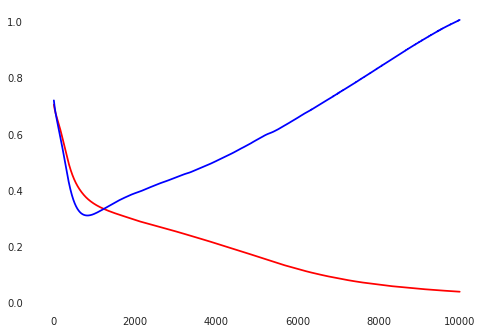

In [38]:
# Printăm comparativ cu roșu loss-ul de pe setul de validare și cu albastru loss-ul de pe setul de validare.
plt.plot(losses, "r-", test_losses, "b-")

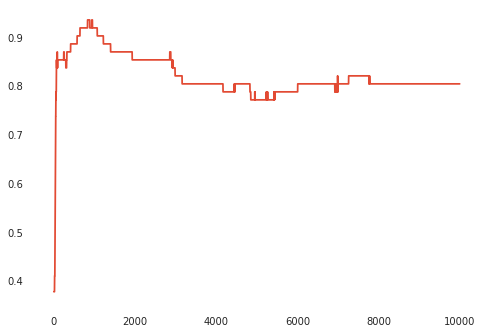

In [39]:
plt.plot(accuracies)

In [40]:
def try_a_single_example_with_the_network(index_from_the_validation_set):
  with torch.no_grad():
    pred_test = net(X_test[index_from_the_validation_set].view(1, -1))
    _, preds_y = torch.max(pred_test, 1)
    print(preds_y)

In [41]:
try_a_single_example_with_the_network(60)

tensor([0])
